<h1 align=center > Insurance Claim Analysis </h1>

In [310]:
# import all necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [311]:
df = pd.read_csv('insurance_data.csv')
df.sample(10)

index  PatientID   age  gender   bmi  bloodpressure diabetic  children  \
188     188        189  35.0    male  30.0             86       No         1   
91       91         92  20.0    male  40.5             95       No         0   
672     672        673  20.0    male  39.7             90       No         1   
201     201        202  59.0  female  16.8             96      Yes         1   
70       70         71  28.0    male  26.5             88      Yes         0   
729     729        730  31.0    male  28.7            107      Yes         3   
205     205        206  48.0  female  22.6             94       No         0   
712     712        713  24.0    male  32.3            105       No         1   
1007   1007       1008  45.0  female  30.6             85       No         1   
755     755        756  47.0  female  37.1            101      Yes         0   

     smoker     region     claim  
188      No  southwest   2904.09  
91       No  southeast   1984.45  
672      No  southwest   9391.35  
201      No  northeast   3167.46  
70       No  southeast   1815.88  
729      No  northwest  10264.44  
205      No  northwest   3176.82  
712      No  northeast   9964.06  
1007     No  northeast  16796.41  
755      No  southwest  10713.64

# Data Cleaning

In [312]:
df.drop(columns=['index','PatientID'],inplace=True)
df.head()

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2             91      Yes         0     No  southeast   
1  24.0   male  30.1             87       No         0     No  southeast   
2   NaN   male  33.3             82      Yes         0     No  southeast   
3   NaN   male  33.7             80       No         0     No  northwest   
4   NaN   male  34.1            100       No         0     No  northwest   

     claim  
0  1121.87  
1  1131.51  
2  1135.94  
3  1136.40  
4  1137.01

# Dimension of data

In [313]:
df.shape

(1340, 9)

# How Many Null Values

In [314]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

> **Observation:** **Age** has 5 and **region** has 3 null values 

# What type of data is?

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [316]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('darkgrid')

# Why do EDA?

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

### Separate out Categorical and Numerical Features

In [317]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['gender', 'diabetic', 'smoker', 'region']


In [318]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['age', 'bmi', 'bloodpressure', 'children', 'claim']


# Seperated Columns

- **Numerical** - age,bmi,bloodpressure,claim
- **Categorical** -gender, diabetic,children,smoker, region

# UniVariant EDA and Feature Engineering

# Age 

- **Missing Values**     3 
- **Shape** Binomial
- **Outliers** No|

In [319]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

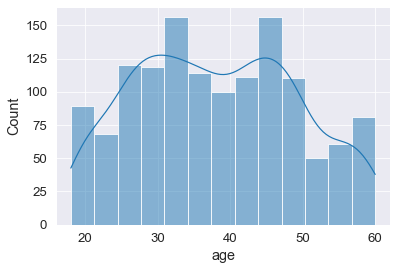

In [320]:
sns.histplot(df['age'],kde=True);

- Data is almost Binomiallly Distributed
- Mostly Patience are of age 30 to 35 and 40 to 45

<AxesSubplot: xlabel='age', ylabel='Density'>

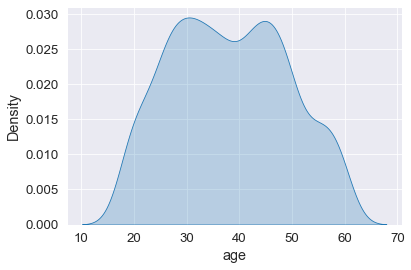

In [321]:
sns.kdeplot(df['age'],fill=True)

In [322]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [323]:
df['age'].skew()

0.11382341584545372

In [324]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [325]:
df['age'].isnull().sum()

0

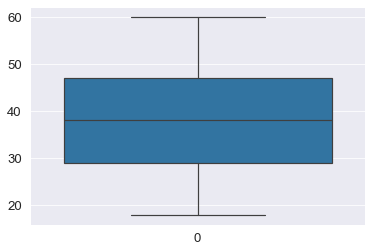

In [326]:
sns.boxplot(df['age']);

> No Outliers

# Catagorical_Data_Frame

In [327]:
cat_df = pd.DataFrame()

# BMI

- **Missing Values**     0 
- **Shape** Noraml Distriubution
- **Outliers** 4 max 

In [328]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<AxesSubplot: xlabel='bmi', ylabel='Count'>

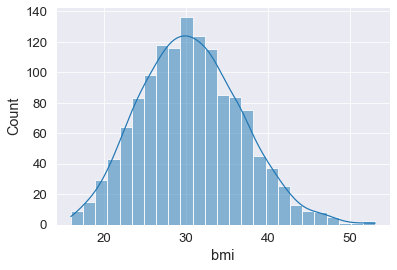

In [329]:
sns.histplot(df['bmi'],kde=True)

<AxesSubplot: xlabel='bmi', ylabel='Density'>

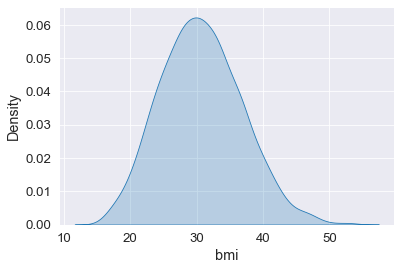

In [330]:
sns.kdeplot(df['bmi'],fill=True)

- Normally Distributed

# Outliers Detection

In [331]:
upper_limit= df['bmi'].mean()+3*df['bmi'].std()
upper_limit

48.9891595244066

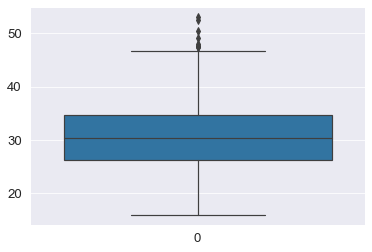

In [332]:
sns.boxplot(df['bmi']);

In [333]:
df[df['bmi']>upper_limit].shape

(4, 9)

- There are 4 outliers in BMI

# Removing Outliers 

In [334]:
df['bmi']= np.where(df['bmi'] >upper_limit,upper_limit,df['bmi'])

In [335]:
df[df['bmi']>upper_limit].shape

(0, 9)

In [336]:
def bmi_categorizer(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Healthy"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    elif bmi >= 30 and bmi < 40:
        return "Obese"
    else:
        return "Very Obese"

cat_df['bmi'] = df['bmi'].apply(bmi_categorizer)

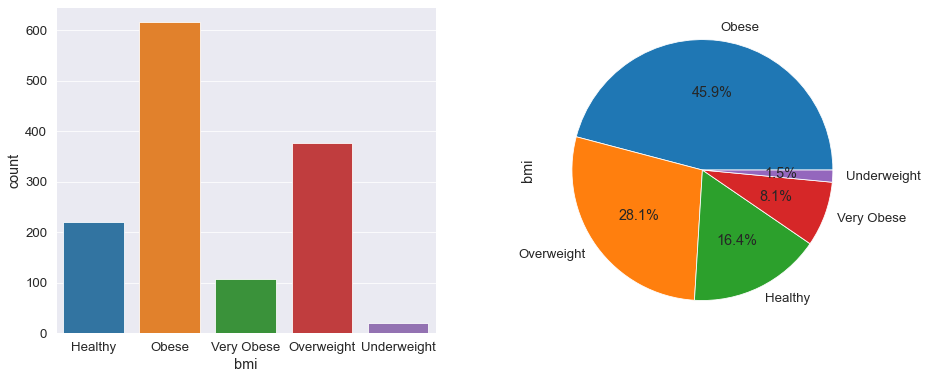

In [337]:
# Increase size of the image i.e lables
fig = plt.figure(figsize=(15,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bmi'],ax=ax1)
cat_df['bmi'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

# Blood Pressure

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [108]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

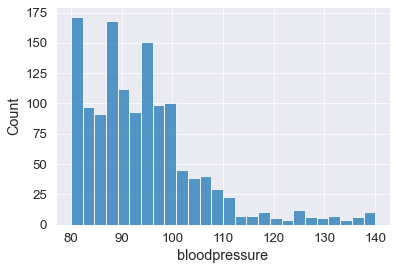

In [109]:
sns.histplot(df['bloodpressure']);

In [110]:
df

age  gender   bmi  bloodpressure diabetic  children smoker  \
0     39.000000    male  23.2             91      Yes         0     No   
1     24.000000    male  30.1             87       No         0     No   
2     38.078652    male  33.3             82      Yes         0     No   
3     38.078652    male  33.7             80       No         0     No   
4     38.078652    male  34.1            100       No         0     No   
...         ...     ...   ...            ...      ...       ...    ...   
1335  44.000000  female  35.5             88      Yes         0    Yes   
1336  59.000000  female  38.1            120       No         1    Yes   
1337  30.000000    male  34.5             91      Yes         3    Yes   
1338  37.000000    male  30.4            106       No         0    Yes   
1339  30.000000  female  47.4            101       No         0    Yes   

         region     claim  
0     southeast   1121.87  
1     southeast   1131.51  
2     southeast   1135.94  
3     northwest   1136.40  
4     northwest   1137.01  
...         ...       ...  
1335  northwest  55135.40  
1336  northeast  58571.07  
1337  northwest  60021.40  
1338  southeast  62592.87  
1339  southeast  63770.43  

[1340 rows x 9 columns]

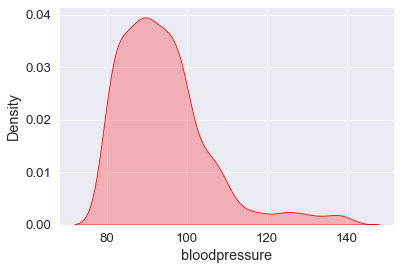

In [111]:
sns.kdeplot(df['bloodpressure'], fill=True, color='red', cbar=True);

- **Positively Skewed Data in BloodPressure**

In [112]:
df['bloodpressure'].skew()

1.4835342102293079

In [113]:
def bp_categorizer(bp):
    if 80<=bp < 89:
        return "elevated"
    elif 90<= bp <= 99:
        return "High"
    elif  99< bp <100:
        return "very high"
    elif 100<=bp<120:
        return "extremely high"
    else:
        return "fatal"

cat_df['bloodpressure'] = df['bloodpressure'].apply(bp_categorizer)

<AxesSubplot: ylabel='bloodpressure'>

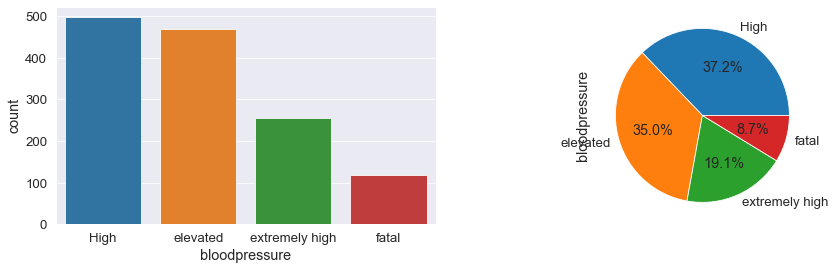

In [114]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bloodpressure'],ax=ax1)
cat_df['bloodpressure'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2)

# Outliers Detection

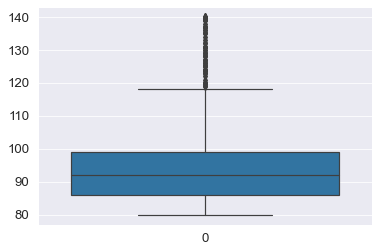

In [115]:
sns.boxplot(df['bloodpressure']);

In [116]:
df.shape

(1340, 9)

# Removing Outliers 

In [117]:
iqr = df['bloodpressure'].quantile(0.75) - df['bloodpressure'].quantile(0.25)
upper_limit= df['bloodpressure'].quantile(0.75) + iqr *1.5
df[df['bloodpressure']>upper_limit].shape

(62, 9)

In [118]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

4.626865671641791

- There are 62 Outliers in BloodPressure Column Which Is 4% of the data 

In [119]:
df['bloodpressure']= np.where(df['bloodpressure'] >upper_limit,upper_limit,df['bloodpressure'])
#df = df[df['bloodpressure']<=upper_limit]

# After Removal of Outliers

In [120]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

0.0

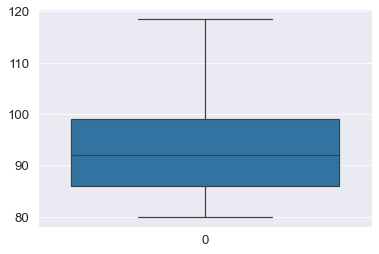

In [121]:
sns.boxplot(df['bloodpressure']);

# claim

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [122]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [123]:
df['claim'].skew()

1.5167468509489237

<AxesSubplot: xlabel='claim', ylabel='Count'>

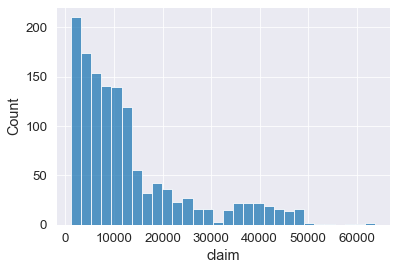

In [124]:
sns.histplot(df['claim'])

<AxesSubplot: xlabel='claim', ylabel='Density'>

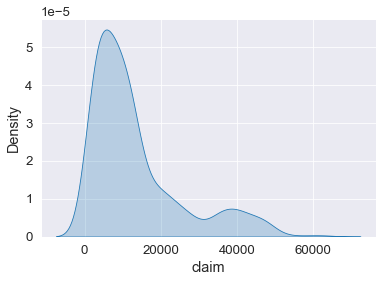

In [125]:
sns.kdeplot(df['claim'],fill=True)

<AxesSubplot: >

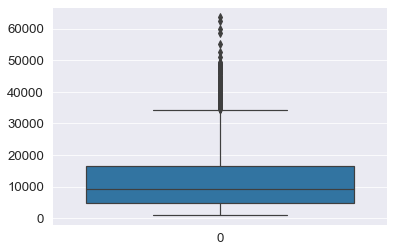

In [126]:
sns.boxplot(df['claim'])

# Removing Outliers 

In [127]:
iqr = df['claim'].quantile(0.75) - df['claim'].quantile(0.25)
upper_limit= df['claim'].quantile(0.75) + iqr *1.5
df[df['claim']>upper_limit].shape[0]

141

In [128]:
(df[df['claim']>upper_limit].shape[0]/df.shape[0])*100

10.522388059701493

- There are 139 Outliers in Claim  Which Is 10% of the data 

In [129]:
df['claim']= np.where(df['claim'] >upper_limit,upper_limit,df['claim'])

In [130]:
df.dropna(inplace=True)

# Bivariant EDA

# Catagorical Columns
- Gender
- diabetic
- Region
- smoker

In [131]:
sns.set_context('paper', font_scale = 1.7)

<AxesSubplot: ylabel='gender'>

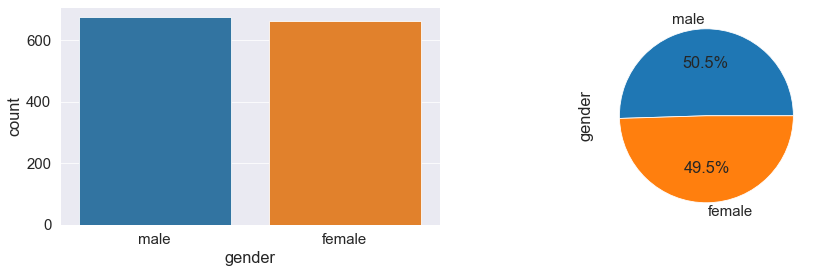

In [132]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['gender'],ax=ax1)
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2)

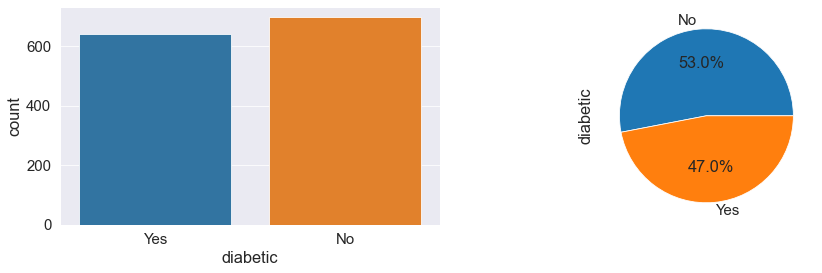

In [133]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['diabetic'],ax=ax1)
df[df['gender']=='male']['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

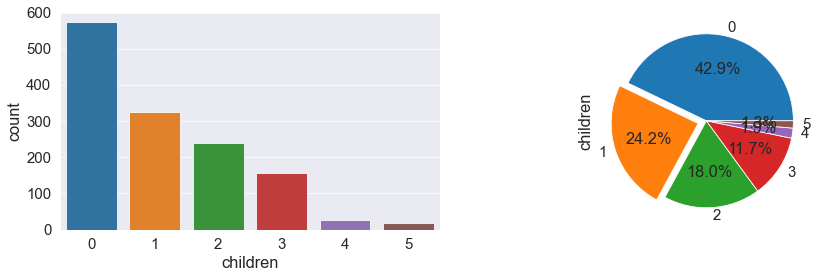

In [134]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['children'],ax=ax1)
df['children'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1,0,0,0,0]);

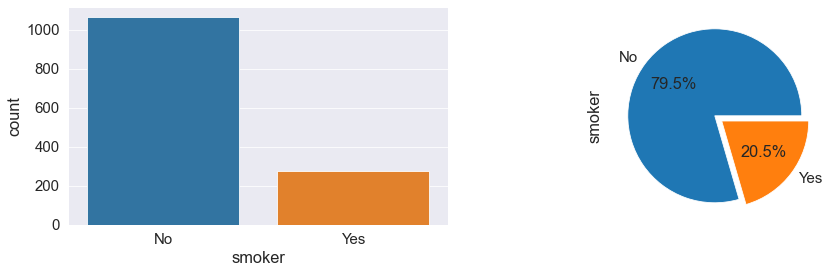

In [135]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['smoker'],ax=ax1)
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1]);

In [136]:
df = df[~df['region'].isnull()]

<AxesSubplot: ylabel='region'>

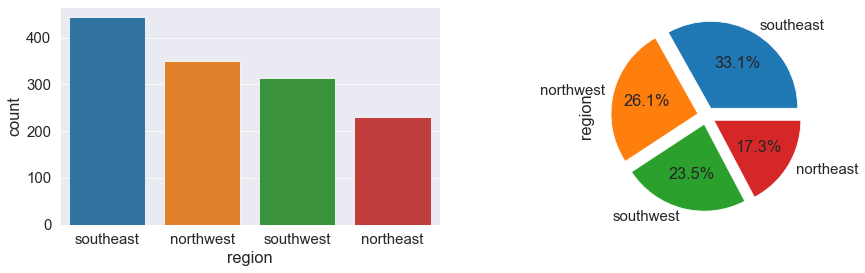

In [137]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['region'],ax=ax1)
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0.1]*4)


In [138]:
df.head(1)

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2           91.0      Yes         0     No  southeast   

     claim  
0  1121.87

# Cat to Cat
- gender with diabetic
- gender with children
- gender with smoker
- gender with region
- bmi_cat with bloodpressure
- bloodpressure_cat with  claim



In [139]:
pd.crosstab(df['gender'],df['diabetic'])

diabetic   No  Yes
gender            
female    339  323
male      358  317

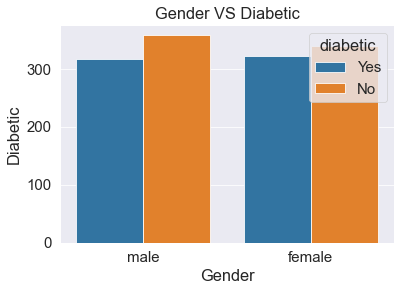

In [140]:
sns.countplot(x=df['gender'],hue=df['diabetic'])
plt.xlabel('Gender')
plt.ylabel('Diabetic')
plt.title('Gender VS Diabetic')
plt.show();

In [141]:
pd.crosstab(df['gender'],df['smoker'])

smoker   No  Yes
gender          
female  547  115
male    516  159

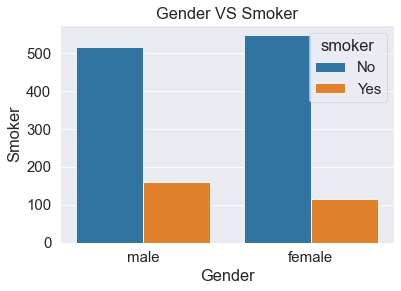

In [142]:
sns.countplot(x=df['gender'],hue=df['smoker'])
plt.xlabel('Gender')
plt.ylabel('Smoker')
plt.title('Gender VS Smoker')
plt.show();


In [143]:
pd.crosstab(df['gender'],df['region'])

region  northeast  northwest  southeast  southwest
gender                                            
female        112        164        224        162
male          119        185        219        152

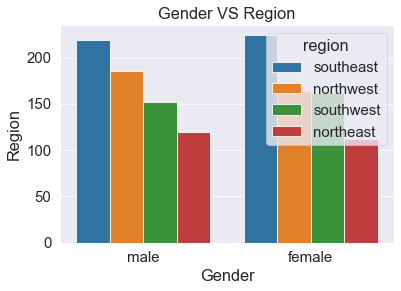

In [144]:
sns.countplot(x=df['gender'],hue=df['region'])
plt.xlabel('Gender')
plt.ylabel('Region')
plt.title('Gender VS Region')
plt.show();

In [145]:
pd.crosstab(df['gender'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
gender                                              
female          249       235             129     49
male            249       232             126     68

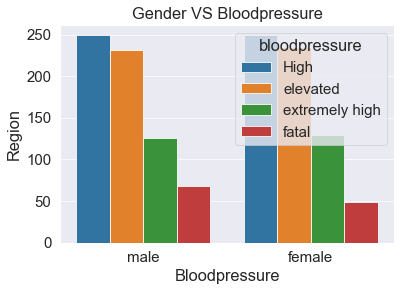

In [146]:
sns.countplot(x=df['gender'],hue=cat_df['bloodpressure'])
plt.xlabel('Bloodpressure')
plt.ylabel('Region')
plt.title('Gender VS Bloodpressure')
plt.show();

In [147]:
pd.crosstab(df['gender'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
gender                                                     
female      114    293         191           12          52
male        106    321         184            8          56

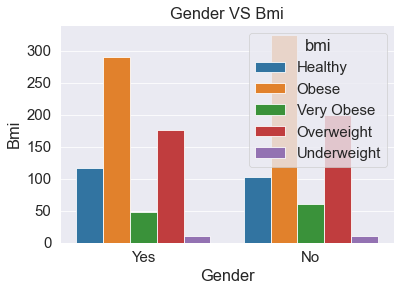

In [148]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('Gender')
plt.ylabel('Bmi')
plt.title('Gender VS Bmi')
plt.show()

In [149]:
pd.crosstab(df['diabetic'],df['smoker'])

smoker     No  Yes
diabetic          
No        559  138
Yes       504  136

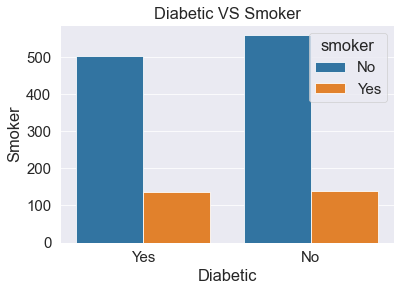

In [150]:

sns.countplot(x=df['diabetic'],hue=df['smoker'])
plt.xlabel('Diabetic')
plt.ylabel('Smoker')
plt.title('Diabetic VS Smoker')
plt.show()

In [151]:
pd.crosstab(df['diabetic'],df['children'])

children    0    1    2   3   4   5
diabetic                           
No        291  179  120  83  13  11
Yes       282  145  120  74  12   7

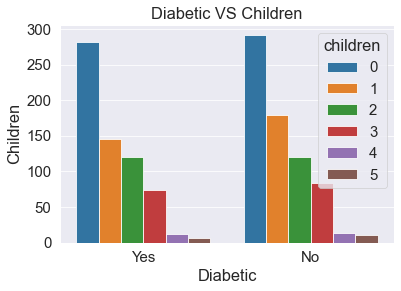

In [152]:
sns.countplot(x=df['diabetic'],hue=df['children'])
plt.xlabel('Diabetic')
plt.ylabel('Children')
plt.title('Diabetic VS Children')
plt.show()

In [153]:
pd.crosstab(df['diabetic'],df['region'])

region    northeast  northwest  southeast  southwest
diabetic                                            
No              110        192        225        170
Yes             121        157        218        144

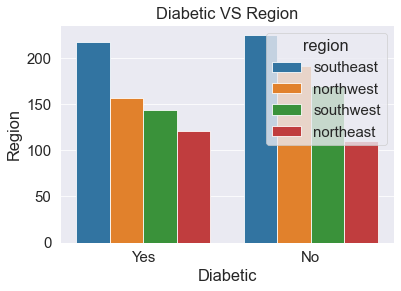

In [154]:
sns.countplot(x=df['diabetic'],hue=df['region'])
plt.xlabel('Diabetic')
plt.ylabel('Region')
plt.title('Diabetic VS Region')
plt.show()

In [155]:
pd.crosstab(df['diabetic'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
diabetic                                            
No              282       231             124     60
Yes             216       236             131     57

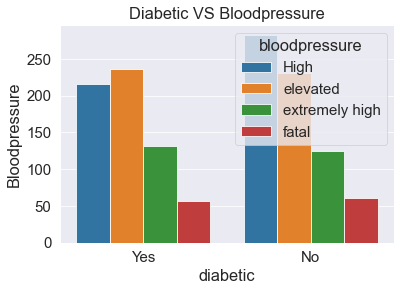

In [156]:
sns.countplot(x=df['diabetic'],hue=cat_df['bloodpressure'])
plt.xlabel('diabetic')
plt.ylabel('Bloodpressure')
plt.title('Diabetic VS Bloodpressure')
plt.show()

In [157]:
pd.crosstab(df['diabetic'],cat_df['bmi'])

bmi       Healthy  Obese  Overweight  Underweight  Very Obese
diabetic                                                     
No            103    324         199           10          61
Yes           117    290         176           10          47

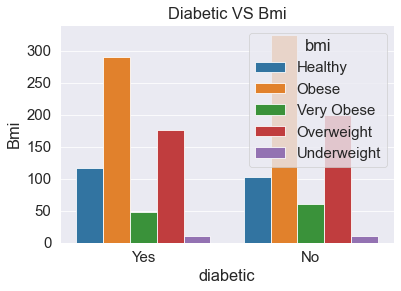

In [158]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('diabetic')
plt.ylabel('Bmi')
plt.title('Diabetic VS Bmi')
plt.show()

In [159]:
pd.crosstab(df['smoker'],df['children'])

children    0    1    2    3   4   5
smoker                              
No        458  263  185  118  22  17
Yes       115   61   55   39   3   1

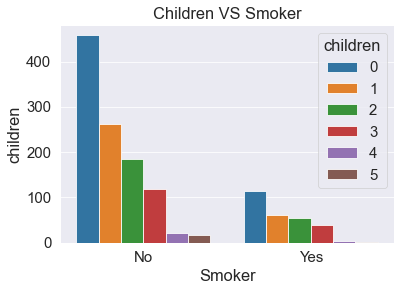

In [160]:
sns.countplot(x=df['smoker'],hue=df['children'])
plt.xlabel('Smoker')
plt.ylabel('children')
plt.title('Children VS Smoker')
plt.show();

In [161]:
pd.crosstab(df['region'],df['smoker'])

smoker      No  Yes
region             
northeast  164   67
northwest  291   58
southeast  352   91
southwest  256   58

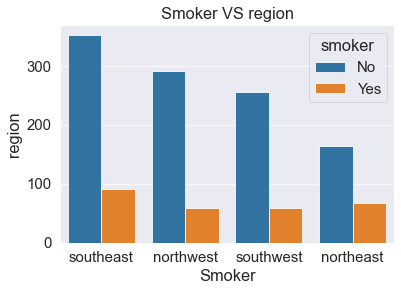

In [162]:
sns.countplot(hue=df['smoker'],x=df['region'])
plt.xlabel('Smoker')
plt.ylabel('region')
plt.title('Smoker VS region')
plt.show()

In [163]:
pd.crosstab(df['smoker'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
smoker                                              
No              437       409             158     59
Yes              61        58              97     58

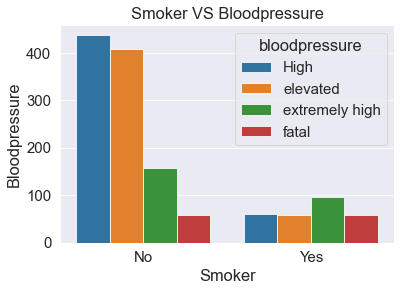

In [164]:
sns.countplot(x=df['smoker'],hue=cat_df['bloodpressure'])
plt.xlabel('Smoker')
plt.ylabel('Bloodpressure')
plt.title('Smoker VS Bloodpressure')
plt.show()

In [165]:
pd.crosstab(df['smoker'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
smoker                                                     
No          171    490         303           15          84
Yes          49    124          72            5          24

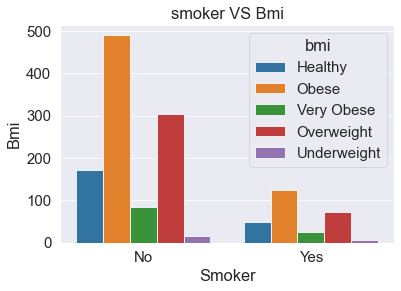

In [166]:
sns.countplot(x=df['smoker'],hue=cat_df['bmi'])
plt.xlabel('Smoker')
plt.ylabel('Bmi')
plt.title('smoker VS Bmi')
plt.show()

# Catagorical and Numerical Columns

- gender with bmi
- gender with bloodpressure
- gender with claim
- diabetic with bmi
- diabetic with bloodpressure
- diabetic with claim
- smoker with bmi
- smoker with bloodpressure
- smoker with claim
- region with bmi
- region with bloodpressure
- region with claim
- cat_bmi with claim
- cat_bloodpressure with claim

In [167]:
sns.set_context('paper', font_scale = 2)

<AxesSubplot: xlabel='gender', ylabel='bmi'>

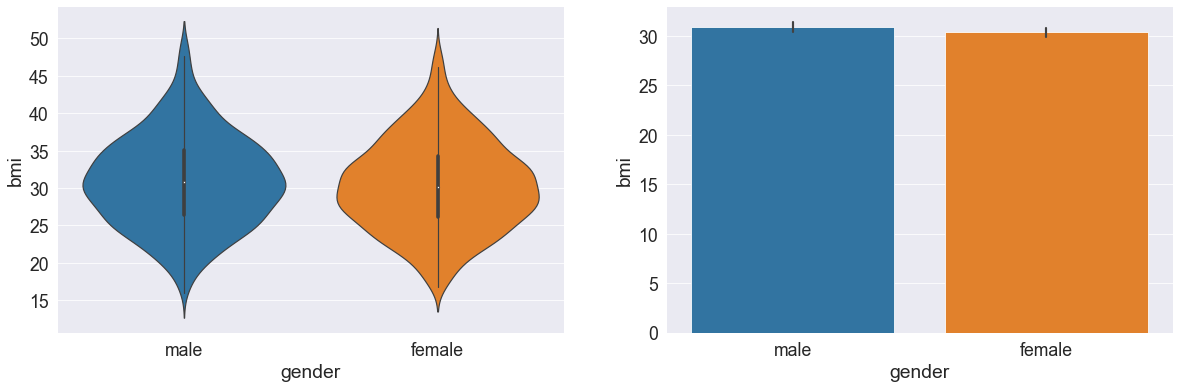

In [168]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

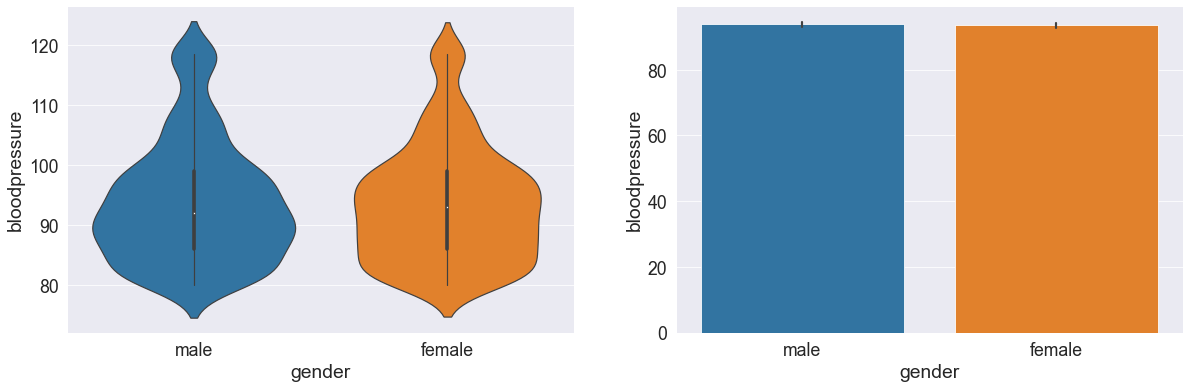

In [169]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='gender', ylabel='claim'>

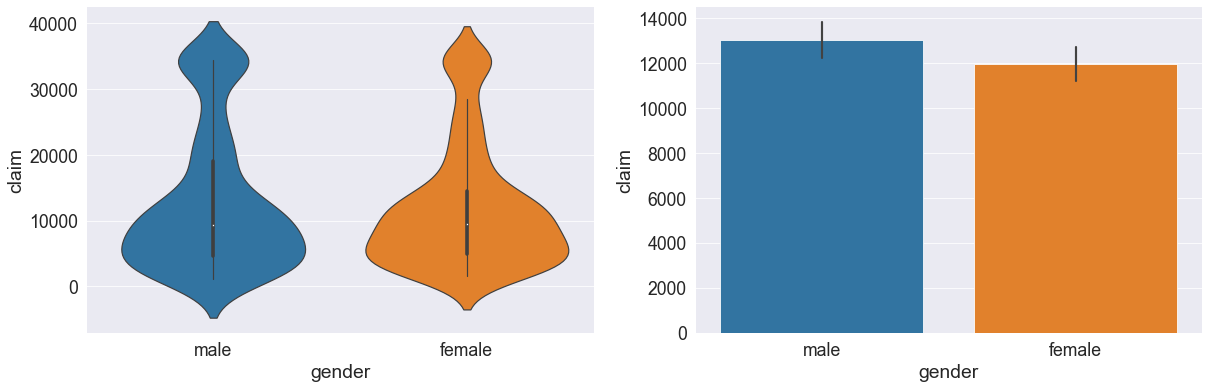

In [170]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='bmi'>

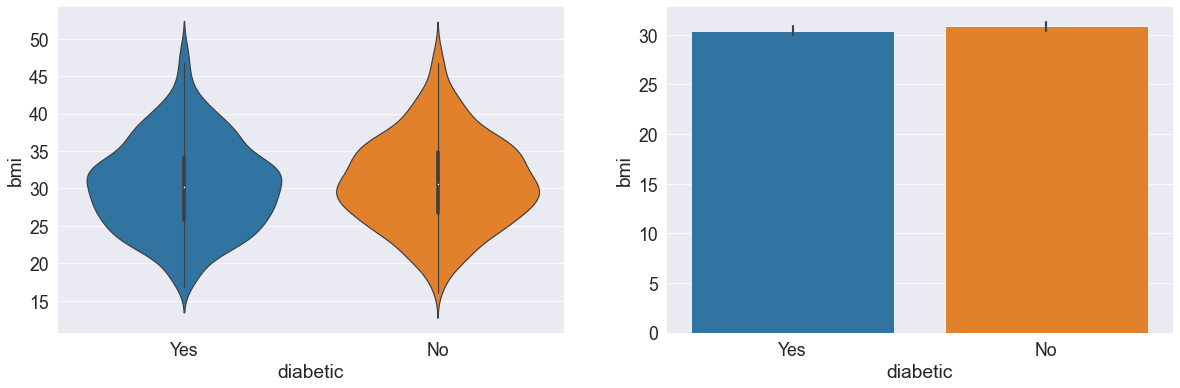

In [171]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='bloodpressure'>

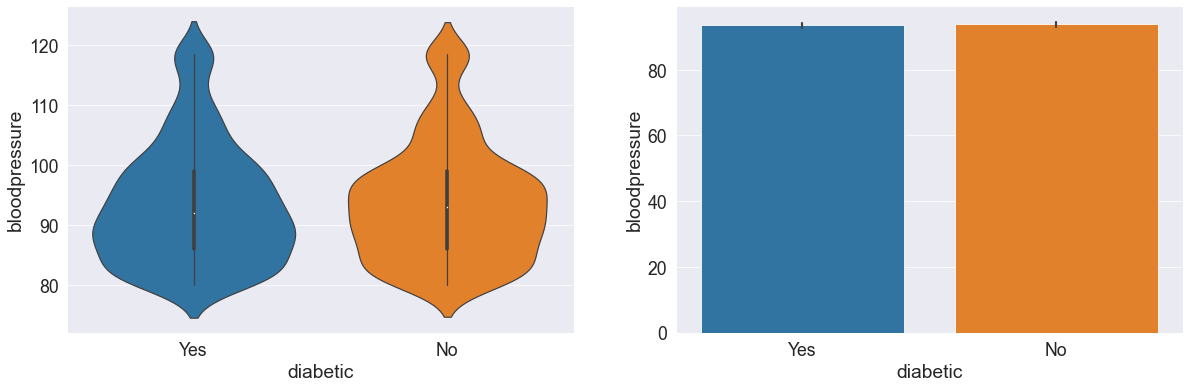

In [172]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='claim'>

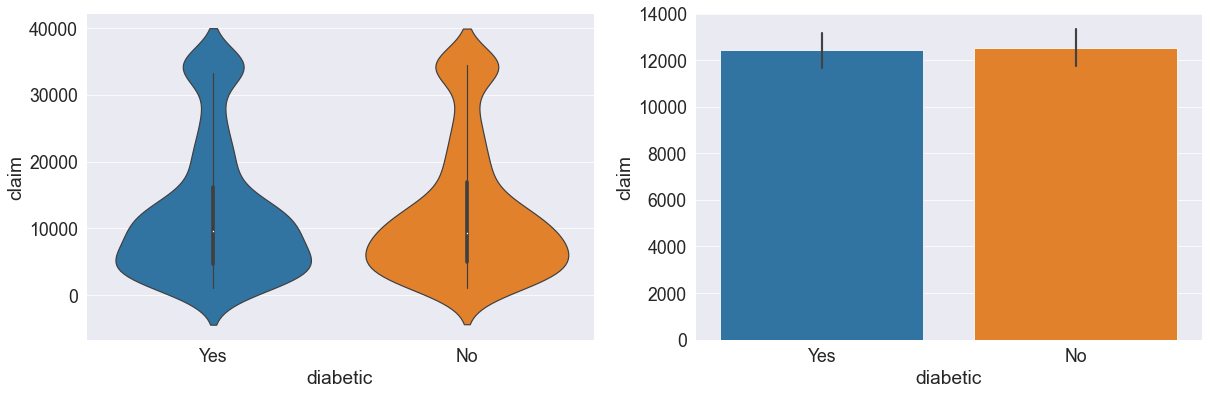

In [173]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='bmi'>

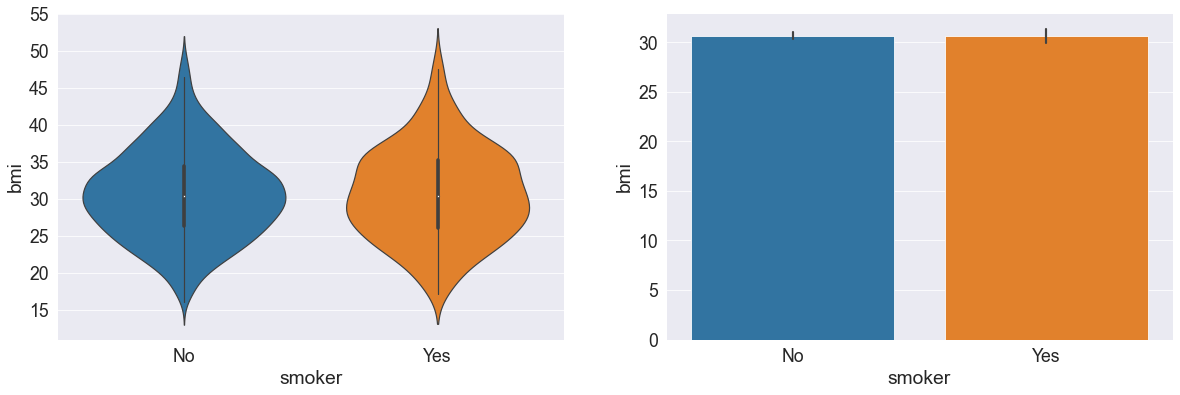

In [174]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='bloodpressure'>

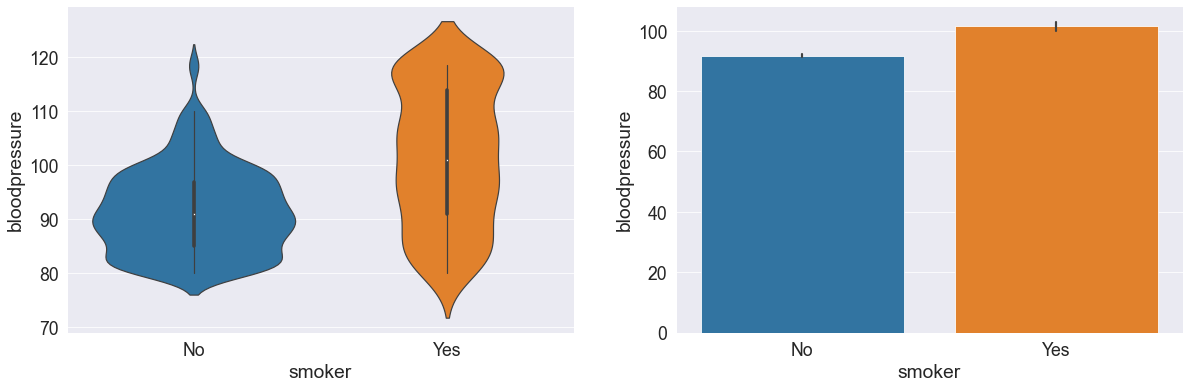

In [175]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='claim'>

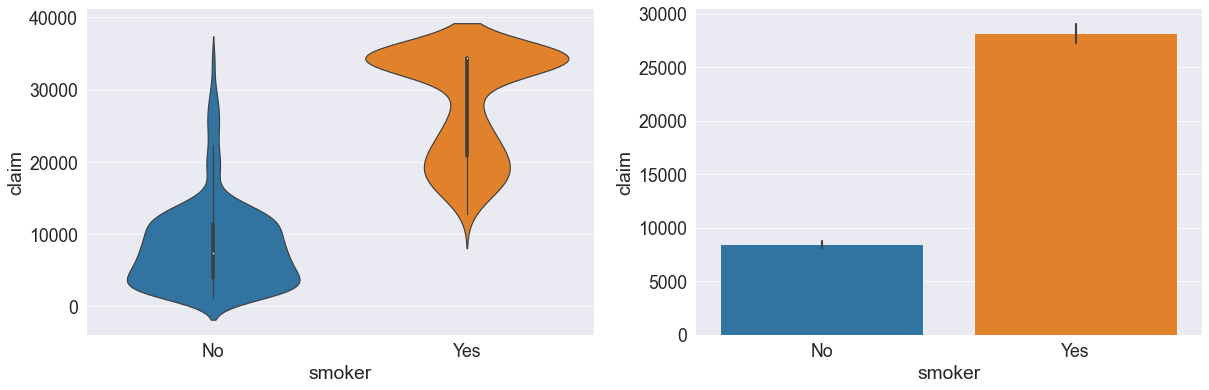

In [176]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['claim'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['claim'],ax=ax2)

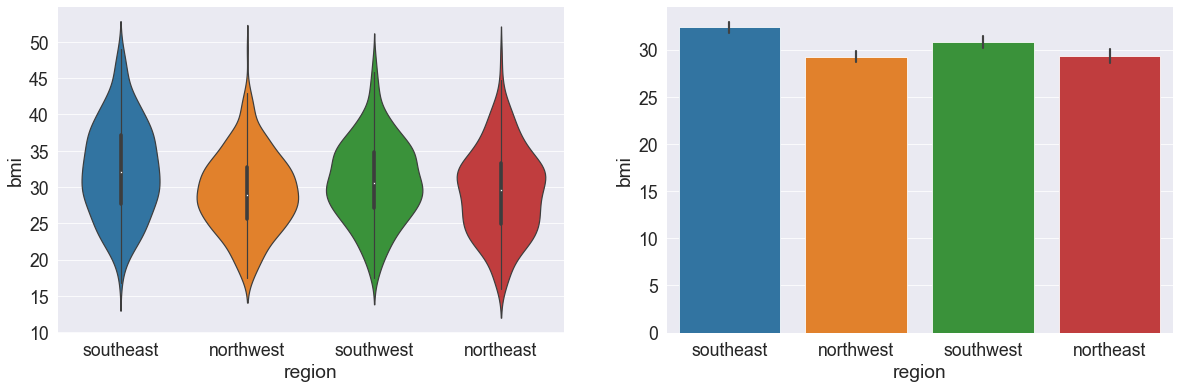

In [177]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['region'],y=df['bmi'],ax=ax2);

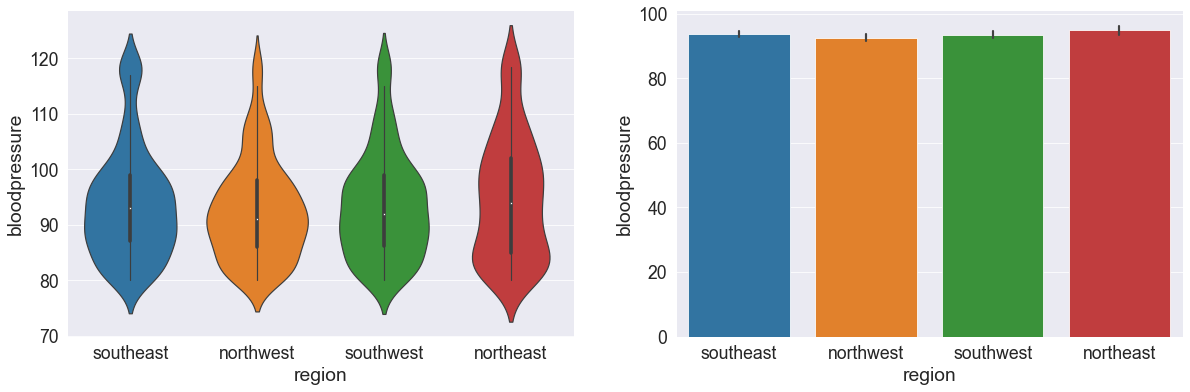

In [178]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['region'],y=df['bloodpressure'],ax=ax2);

<AxesSubplot: xlabel='region', ylabel='claim'>

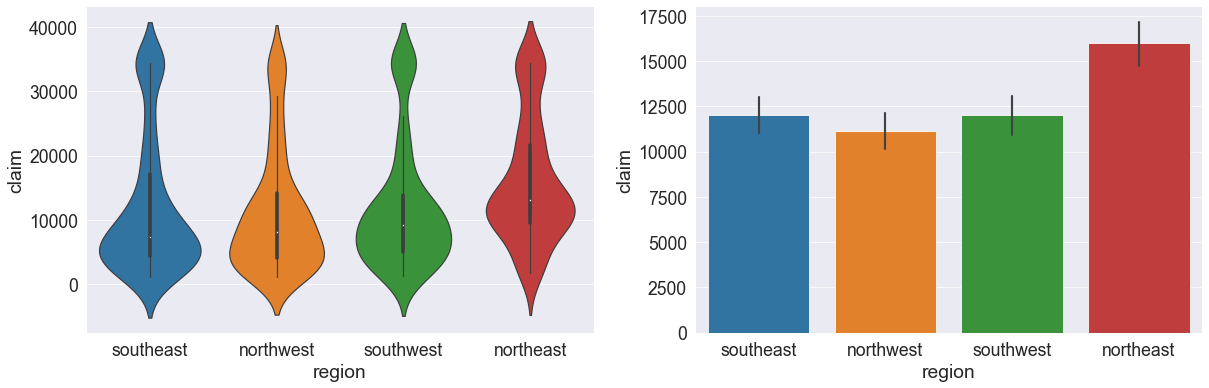

In [179]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['claim'],ax=ax1)
sns.barplot(x=df['region'],y=df['claim'],ax=ax2)

Text(0.5, 1.0, 'Bmi VS Claim')

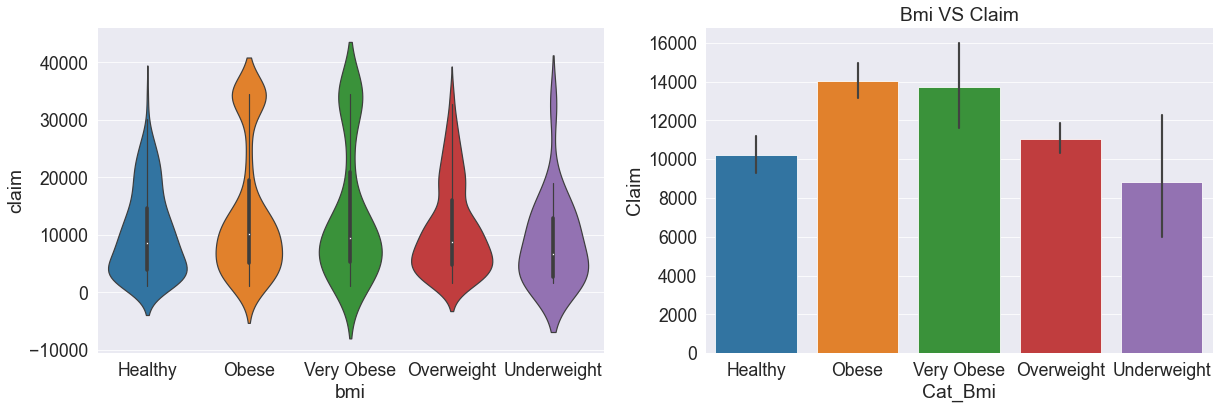

In [180]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],ax=ax2)
plt.xlabel('Cat_Bmi')
plt.ylabel('Claim')
plt.title('Bmi VS Claim')

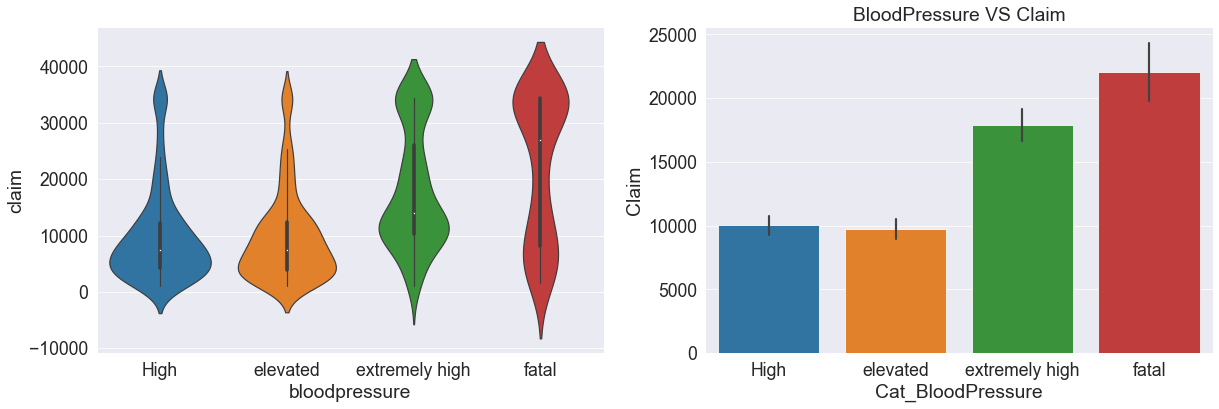

In [181]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],ax=ax2)
plt.xlabel('Cat_BloodPressure')
plt.ylabel('Claim')
plt.title('BloodPressure VS Claim');

# Num to Num
- Age with bmi
- Age with bloodpressure
- Age with claim
- bmi with claim
- bmi with bloodpressure
- bloodpressure with  claim



## Age Vs BloodPressure  Age Vs BMI 

In [182]:
df[num_cols].corr()

age       bmi  bloodpressure  children     claim
age            1.000000 -0.042511      -0.071309 -0.026165 -0.030582
bmi           -0.042511  1.000000       0.141093  0.012078  0.158803
bloodpressure -0.071309  0.141093       1.000000 -0.030587  0.507629
children      -0.026165  0.012078      -0.030587  1.000000  0.072409
claim         -0.030582  0.158803       0.507629  0.072409  1.000000

<AxesSubplot: >

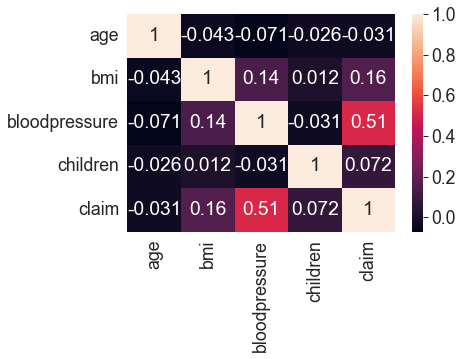

In [183]:
sns.heatmap(df[num_cols].corr(), annot=True)

In [184]:
df[num_cols]

age   bmi  bloodpressure  children      claim
0     39.000000  23.2           91.0         0   1121.870
1     24.000000  30.1           87.0         0   1131.510
2     38.078652  33.3           82.0         0   1135.940
3     38.078652  33.7           80.0         0   1136.400
4     38.078652  34.1          100.0         0   1137.010
...         ...   ...            ...       ...        ...
1335  44.000000  35.5           88.0         0  34431.235
1336  59.000000  38.1          118.5         1  34431.235
1337  30.000000  34.5           91.0         3  34431.235
1338  37.000000  30.4          106.0         0  34431.235
1339  30.000000  47.4          101.0         0  34431.235

[1337 rows x 5 columns]

<AxesSubplot: xlabel='age', ylabel='bmi'>

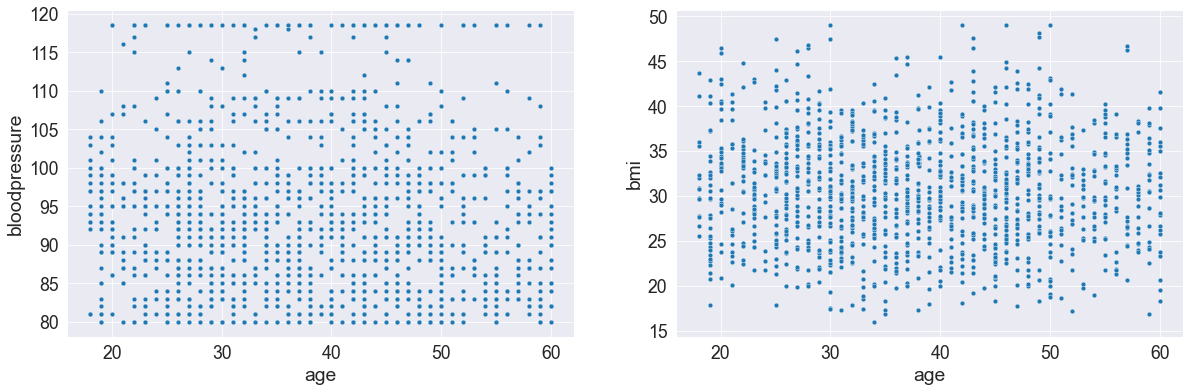

In [185]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax1) 
sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='bmi', ylabel='bloodpressure'>

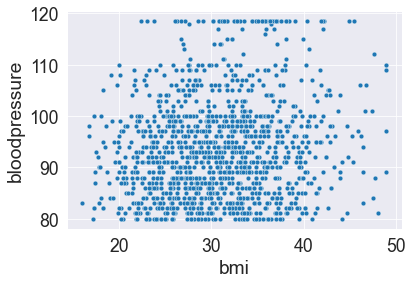

In [186]:
sns.scatterplot(x=df['bmi'],y=df['bloodpressure'])

In [187]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='claim'>

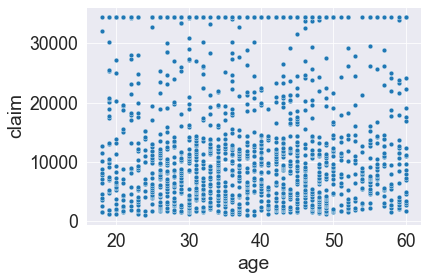

In [188]:
sns.scatterplot(x=df['age'],y=df['claim'])

<AxesSubplot: xlabel='bmi', ylabel='claim'>

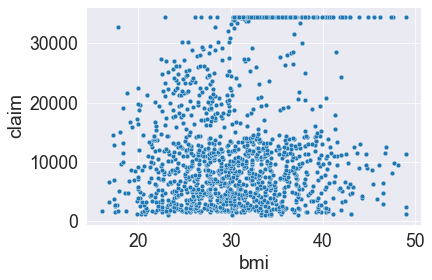

In [189]:
sns.scatterplot(x=df['bmi'],y=df['claim'])

<AxesSubplot: xlabel='bloodpressure', ylabel='claim'>

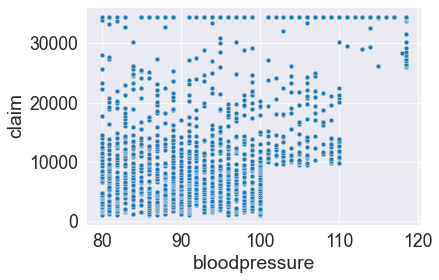

In [190]:
sns.scatterplot(x=df['bloodpressure'],y=df['claim'])

In [191]:
df[df['smoker']=='Yes']['bloodpressure'].describe()

count    274.000000
mean     101.490876
std       12.589930
min       80.000000
25%       91.000000
50%      101.000000
75%      114.000000
max      118.500000
Name: bloodpressure, dtype: float64

# Multivariate Data Anaysis

# Cat to Cat
- gender with diabetic with smoker
- gender with children with smoker
- gender with region with smoker
- bmi_cat with diabetic with smoker
- bmi_cat with children with smoker
- bmi_cat with region with smoker
- blood_ptressure_cat with diabetic with smoker
- blood_ptressure_cat with children with smoker
- blood_ptressure_cat with region with smoker




Text(0.5, 1.0, 'Gender VS BMI VS Children')

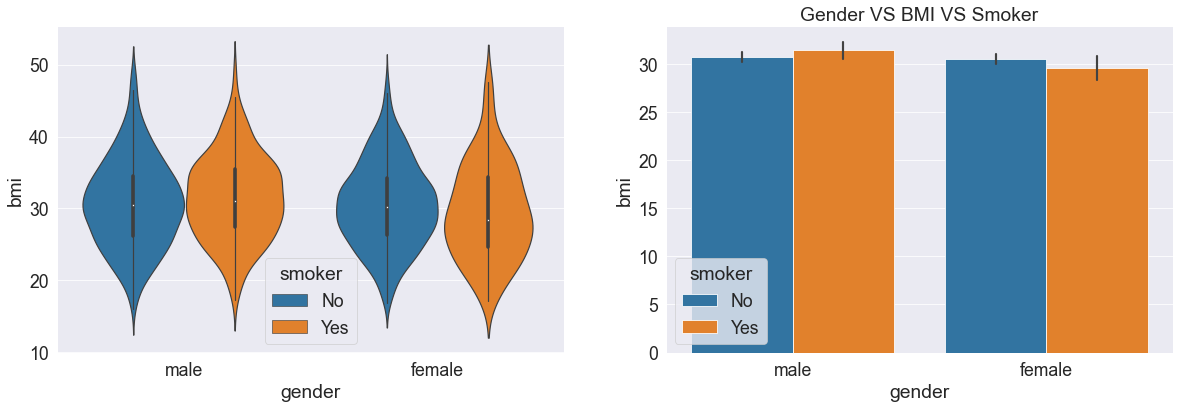

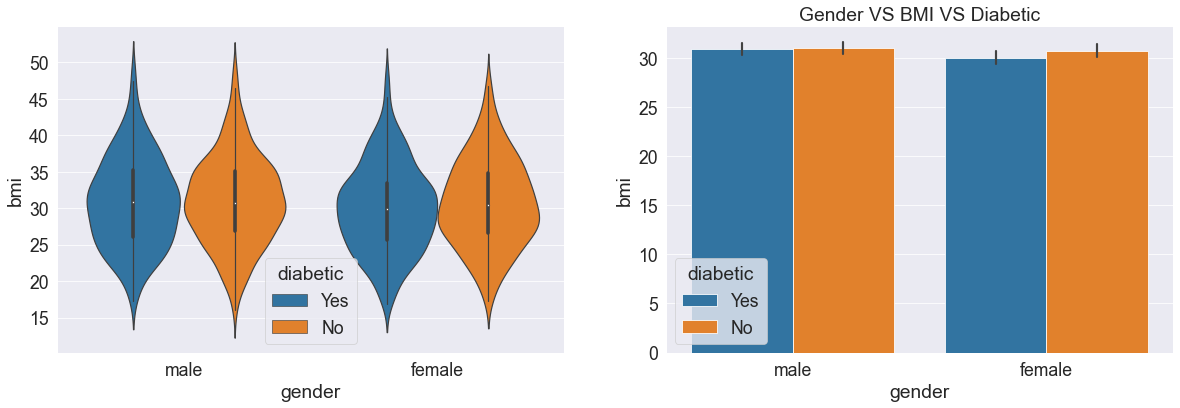

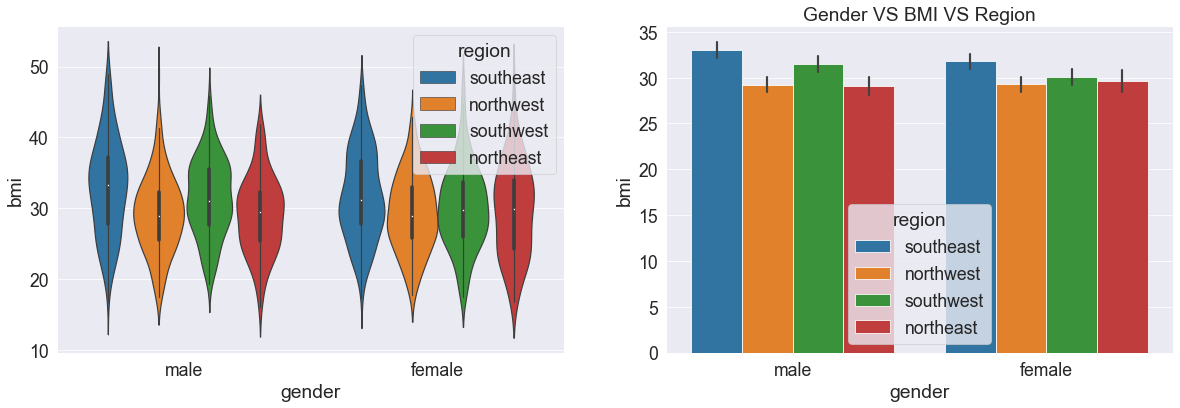

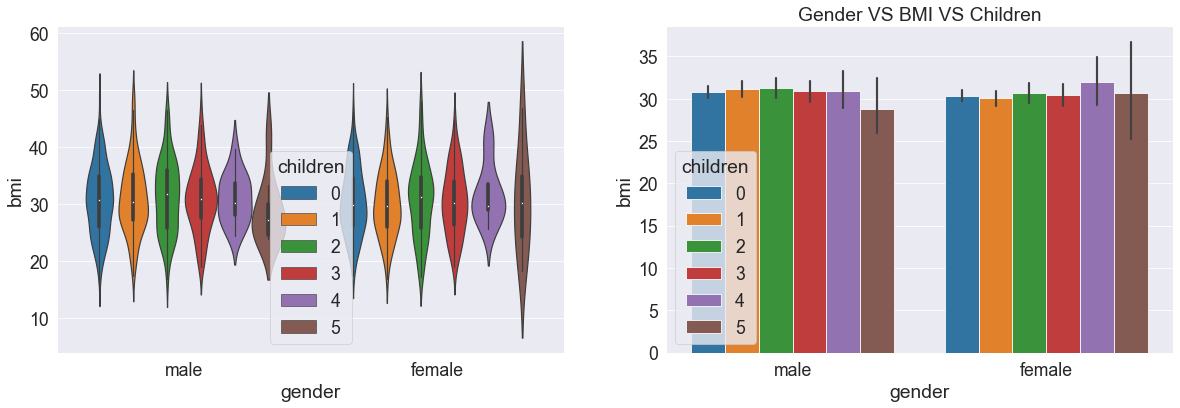

In [192]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS BMI VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS BMI VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Gender VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax2)
plt.title('Gender VS BMI VS Children')

Text(0.5, 1.0, 'Gender VS Bloodpressure VS Children')

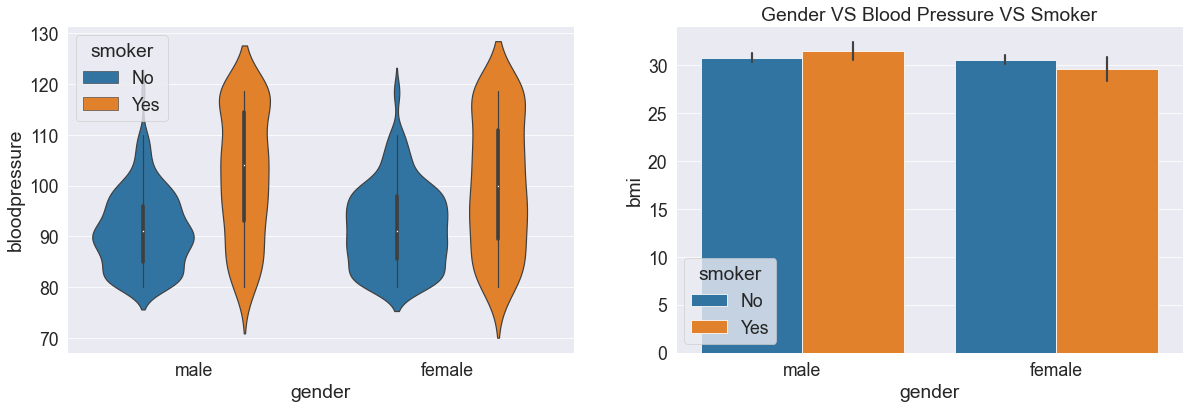

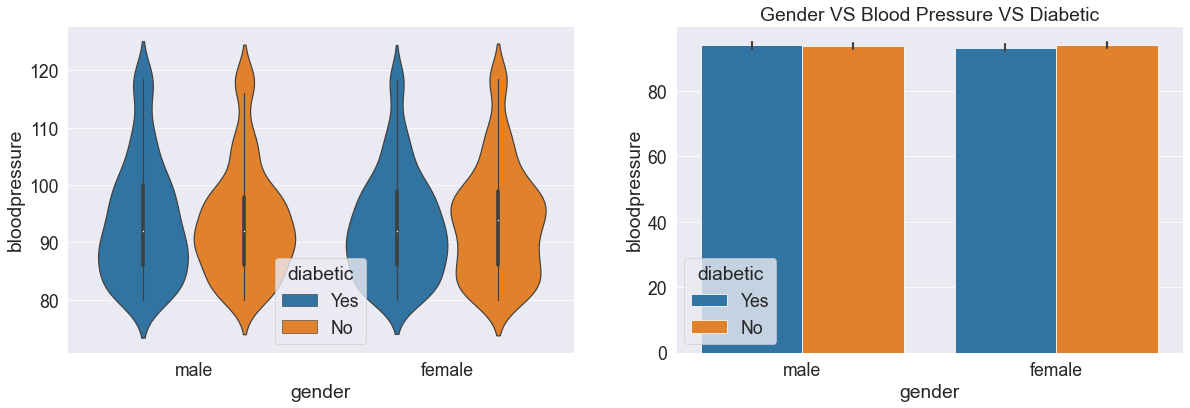

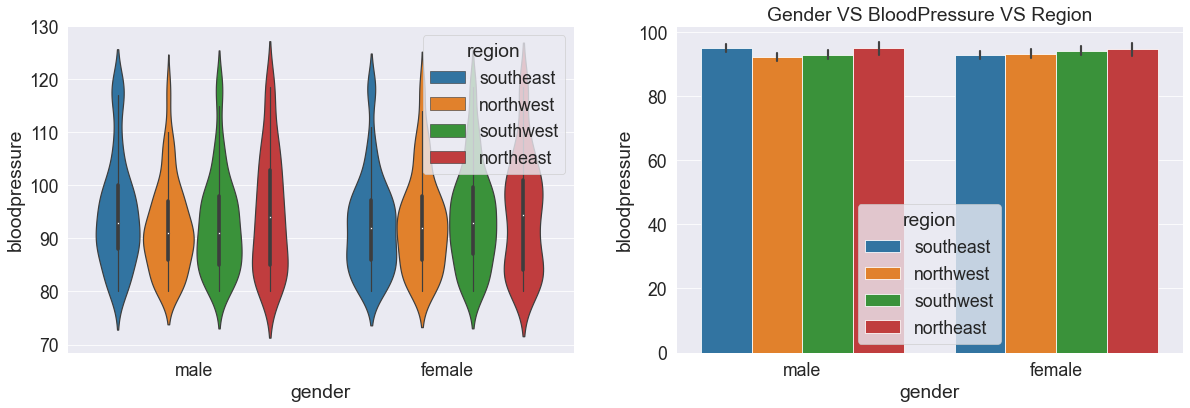

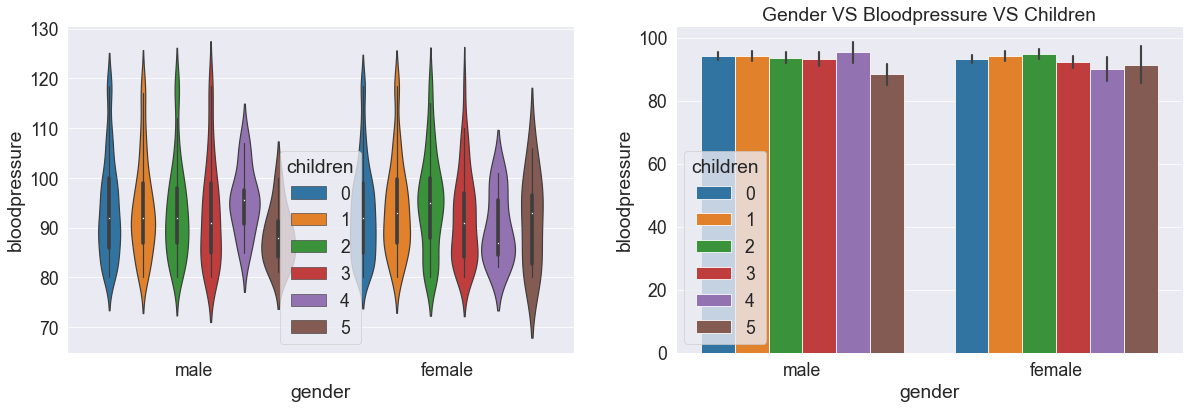

In [193]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
plt.title('Gender VS BloodPressure VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
plt.title('Gender VS Bloodpressure VS Children')

Text(0.5, 1.0, 'Gender VS Claim VS Children')

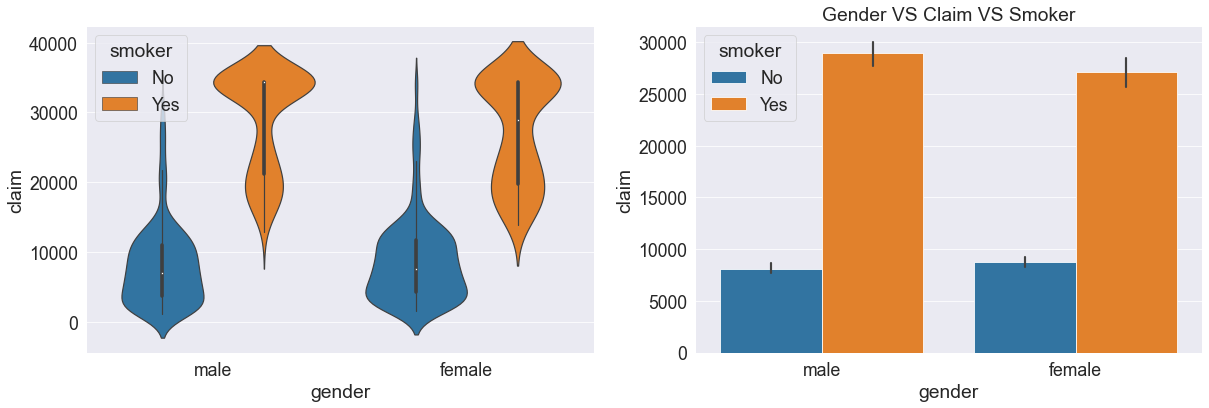

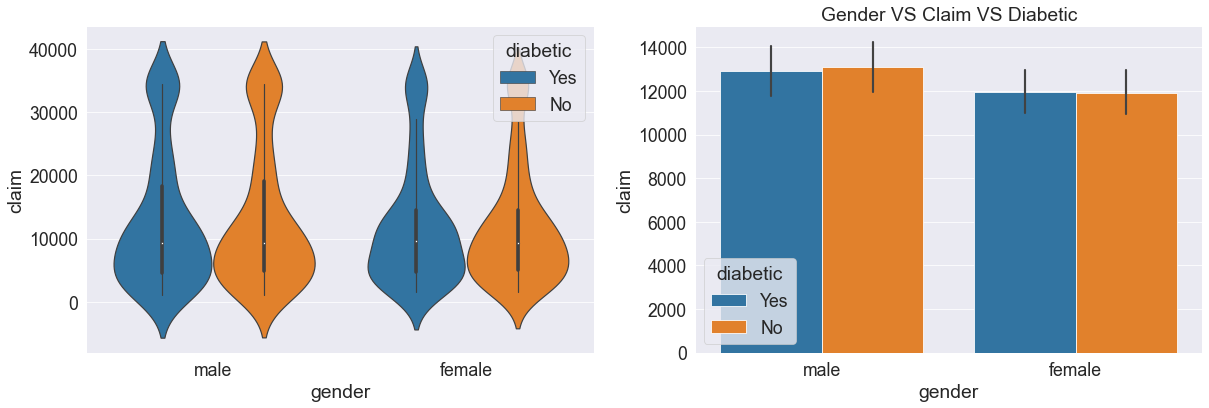

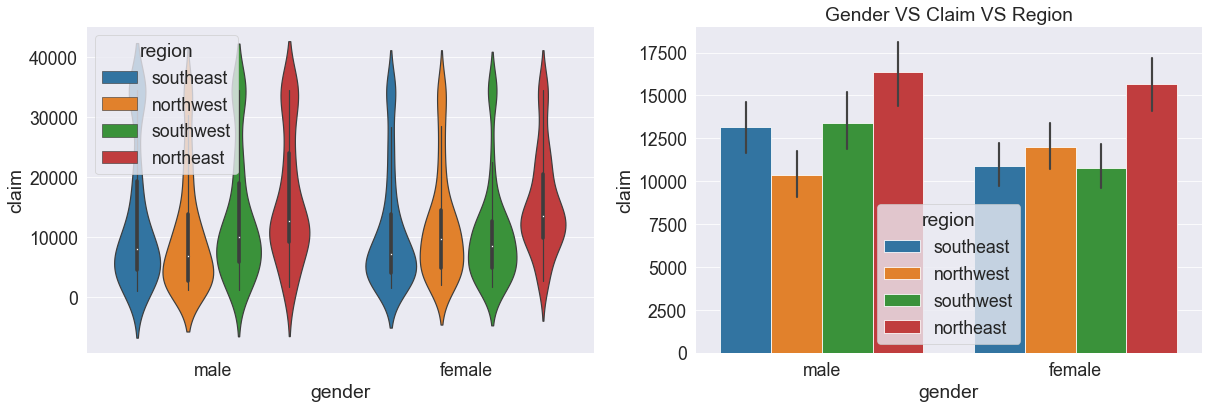

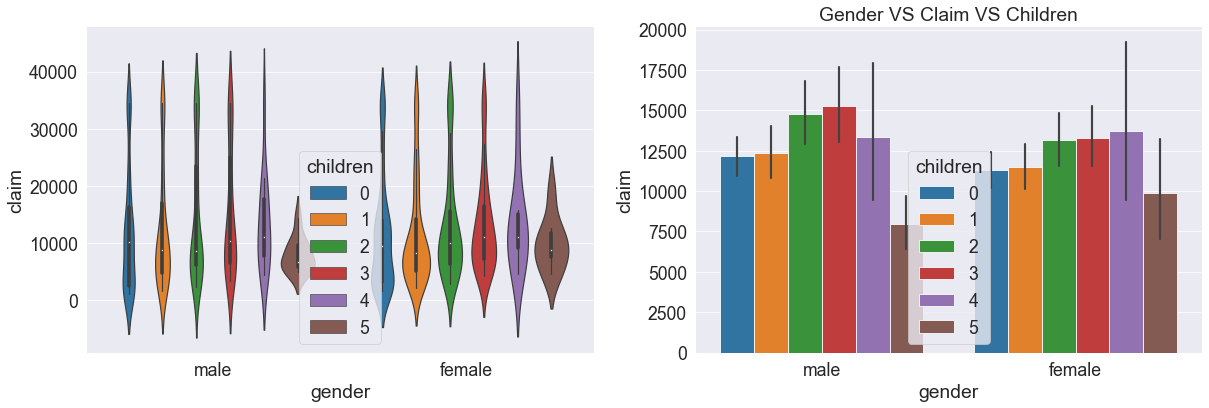

In [194]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Claim VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Claim VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Gender VS Claim VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Gender VS Claim VS Children')

Text(0.5, 1.0, 'Gender VS BMI VS Smoker')

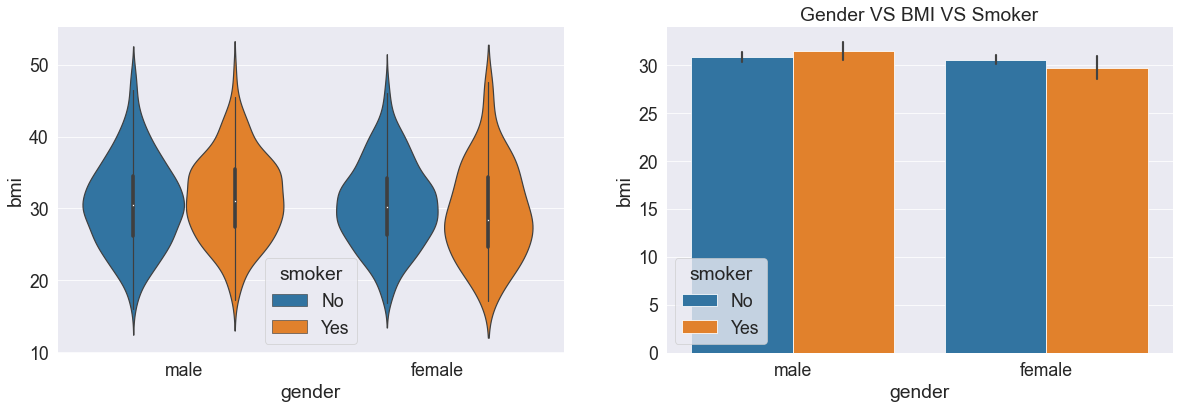

In [195]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS BMI VS Smoker')

Text(0.5, 1.0, 'Gender VS BMI VS Diabetic')

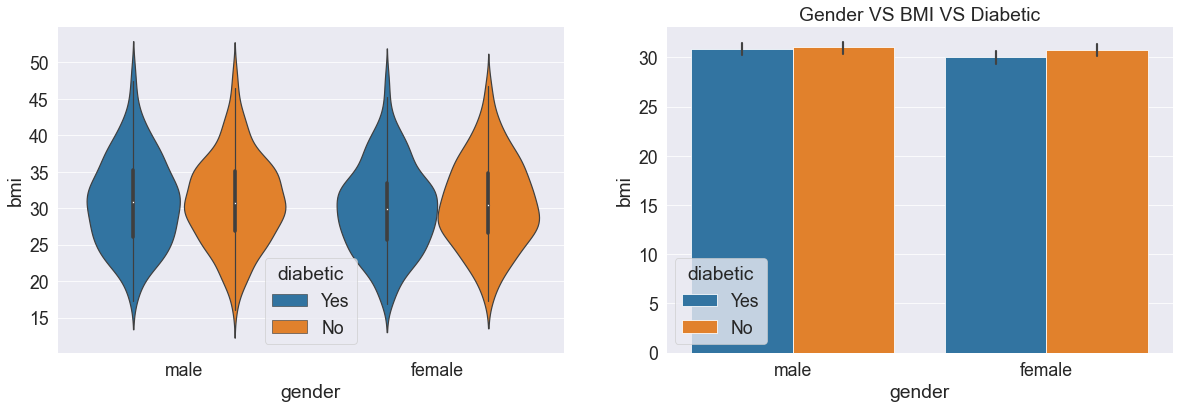

In [196]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS BMI VS Diabetic')

Text(0.5, 1.0, 'Gender VS BMI VS Region')

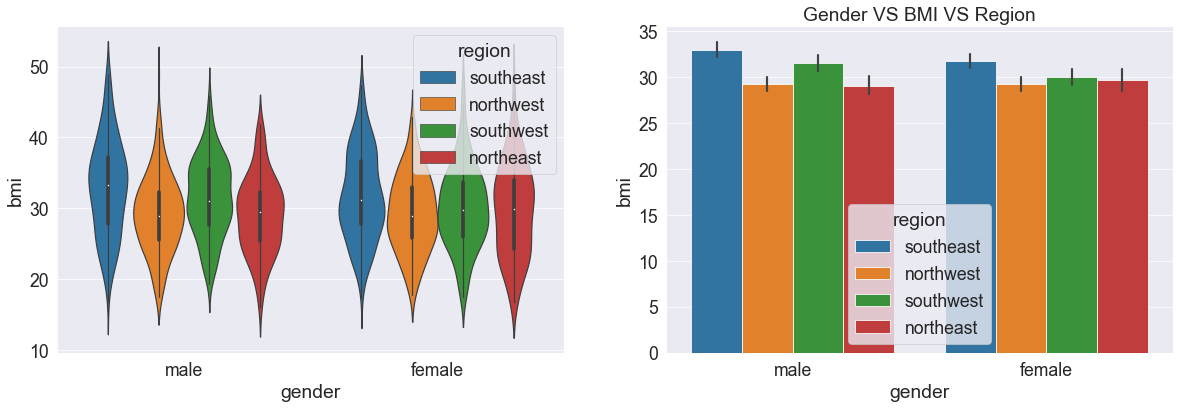

In [197]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Gender VS BMI VS Region')

Text(0.5, 1.0, 'Gender VS Blood Pressure VS Smoker')

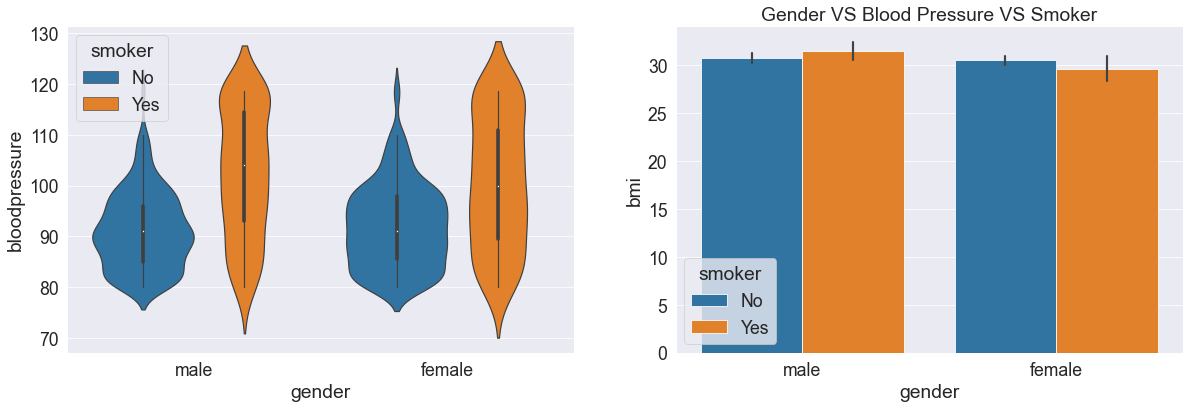

In [198]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Smoker')

Text(0.5, 1.0, 'Gender VS Blood Pressure VS Diabetic')

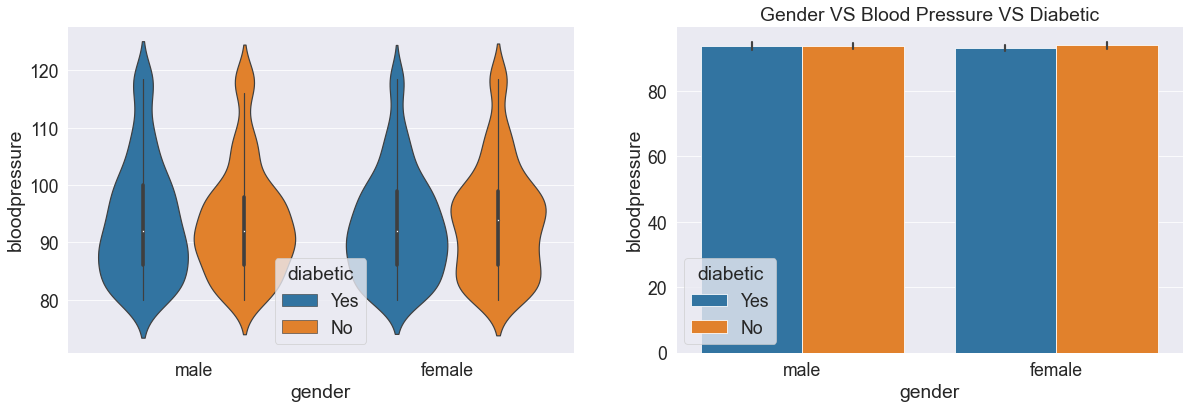

In [199]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Diabetic')

Text(0.5, 1.0, 'Gender VS BloodPressure VS Region')

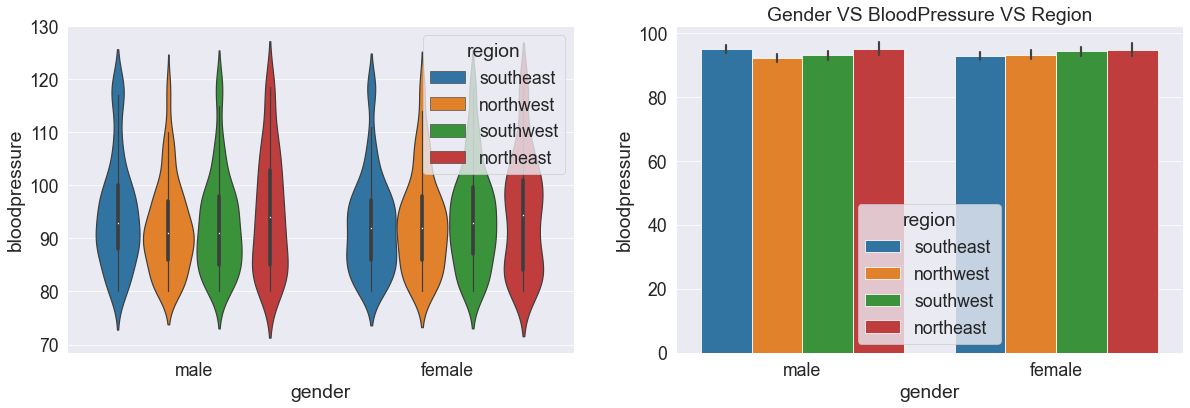

In [200]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
plt.title('Gender VS BloodPressure VS Region')

Text(0.5, 1.0, 'Gender VS Claim VS Smoker')

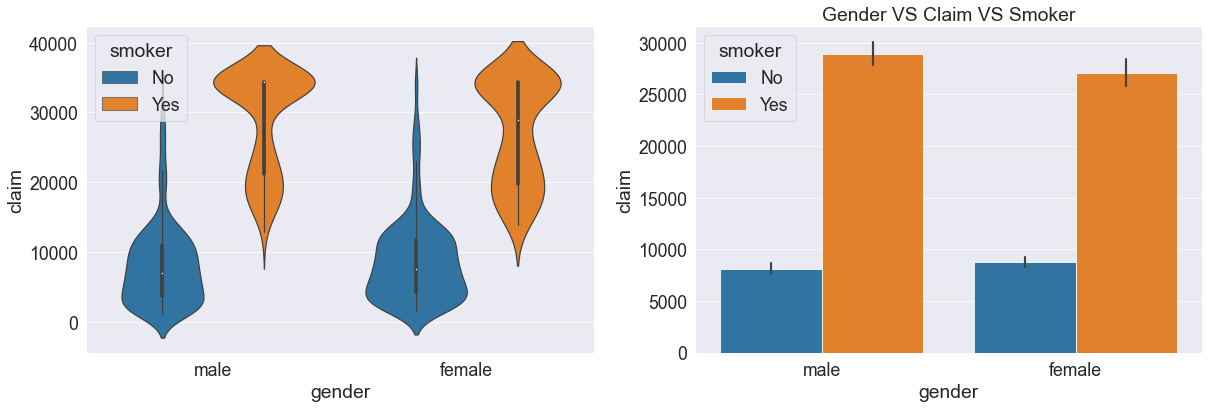

In [201]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Claim VS Smoker')

Text(0.5, 1.0, 'Gender VS Claim VS Diabetic')

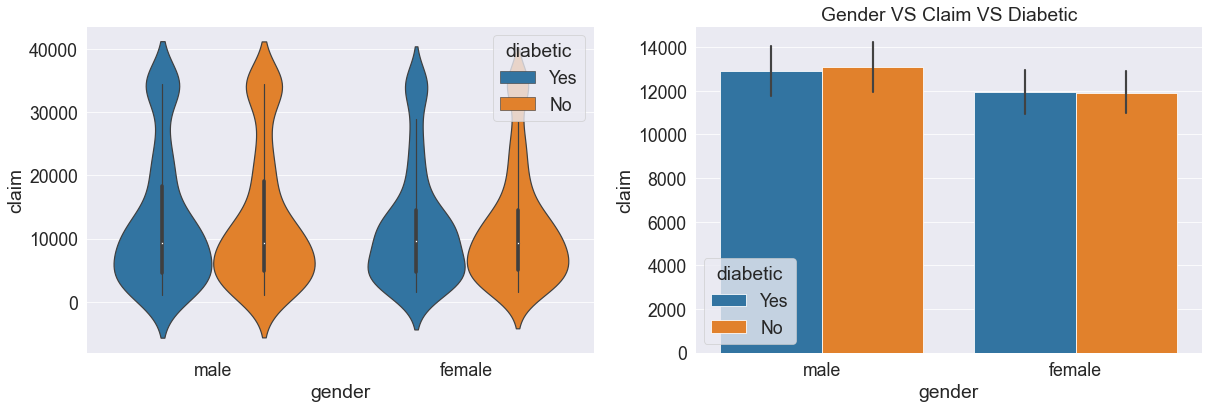

In [202]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Claim VS Diabetic')

Text(0.5, 1.0, 'Gender VS Claim VS Region')

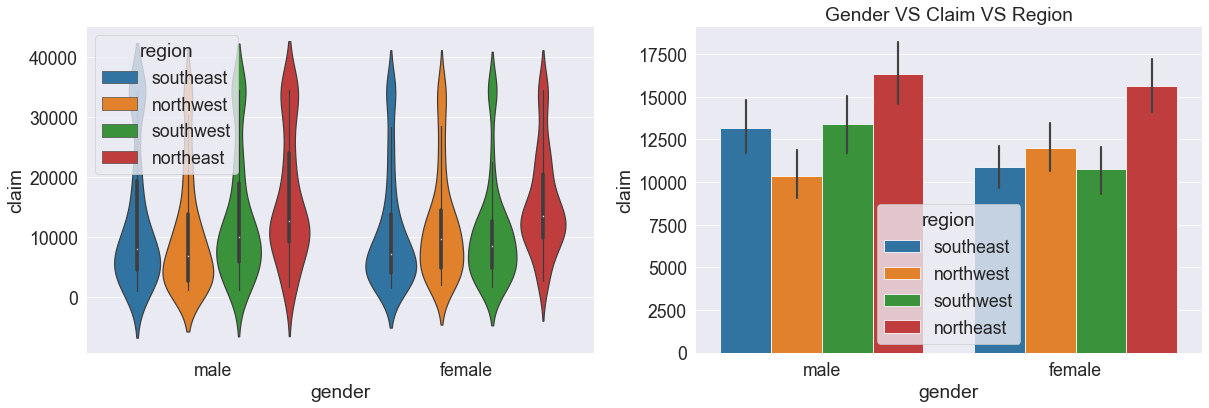

In [203]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Gender VS Claim VS Region')

Text(0.5, 1.0, 'Diabetic VS Bloodpressure VS Children')

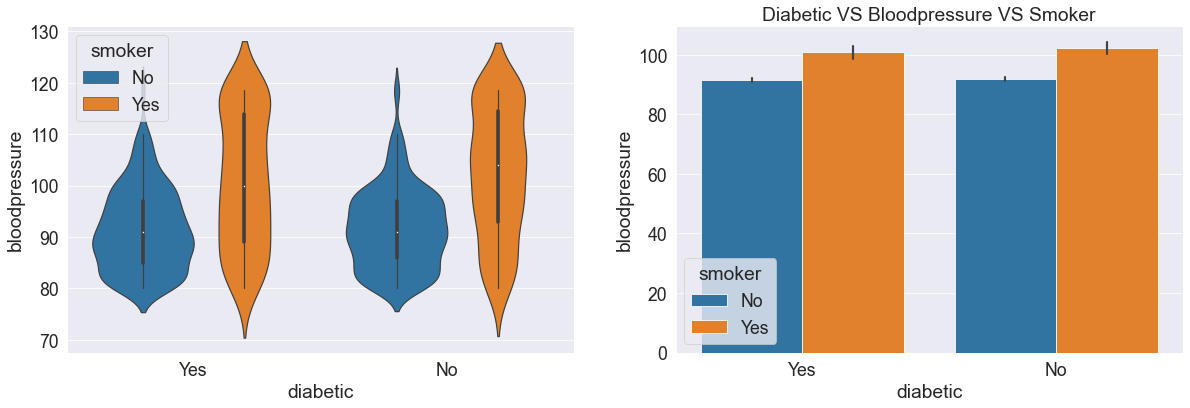

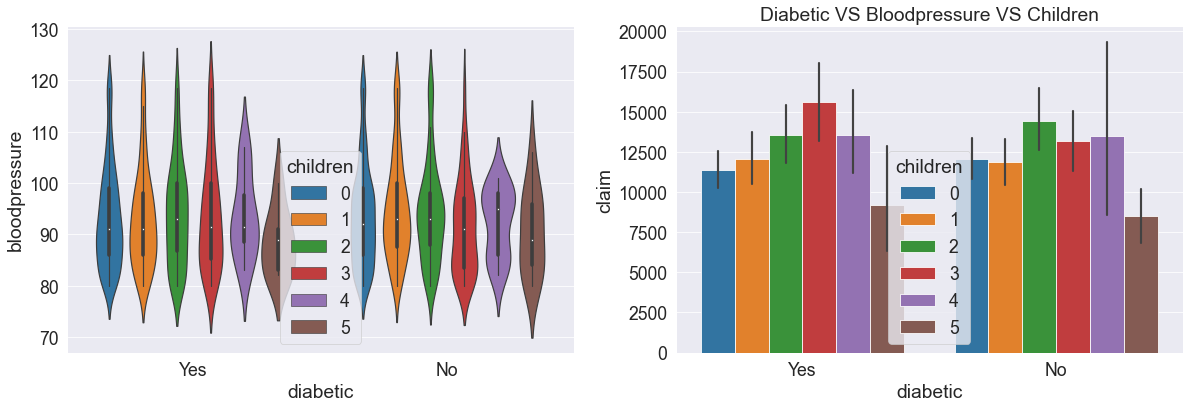

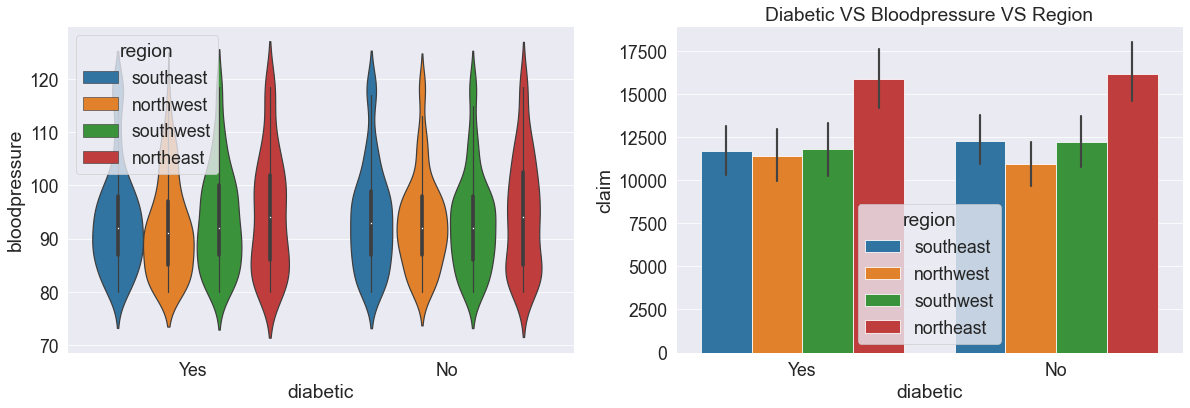

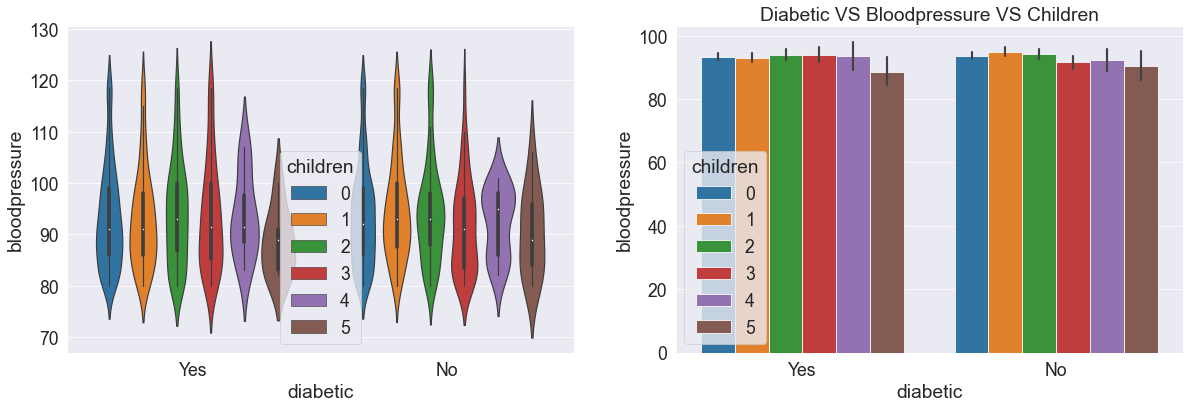

In [204]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Children')

Text(0.5, 1.0, 'Diabetic VS Bmi VS Children')

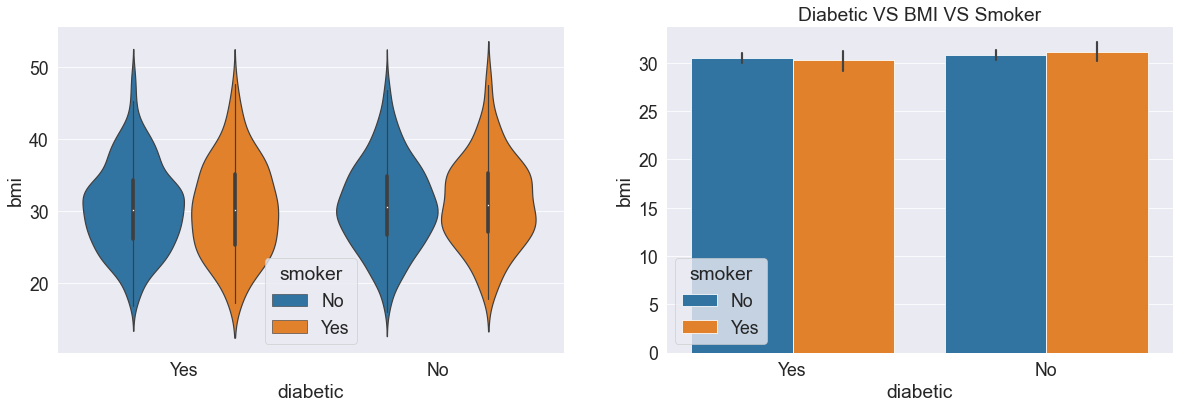

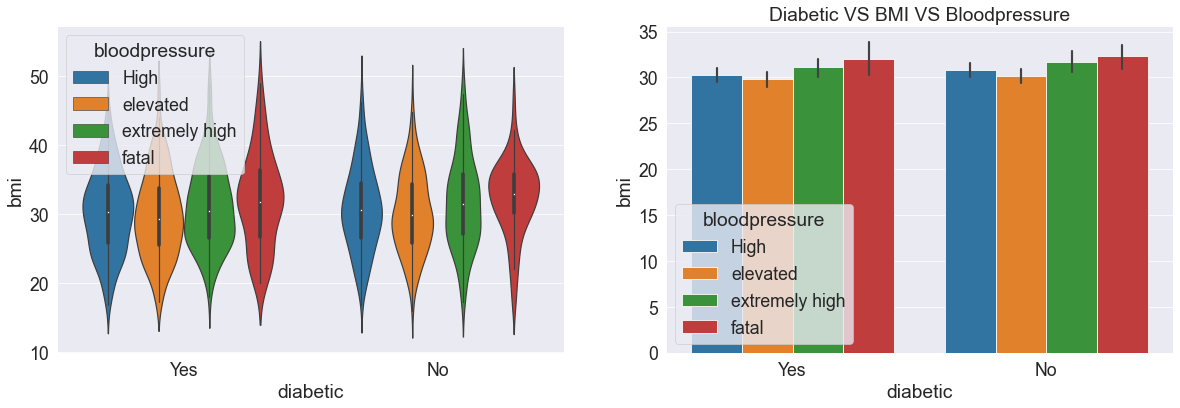

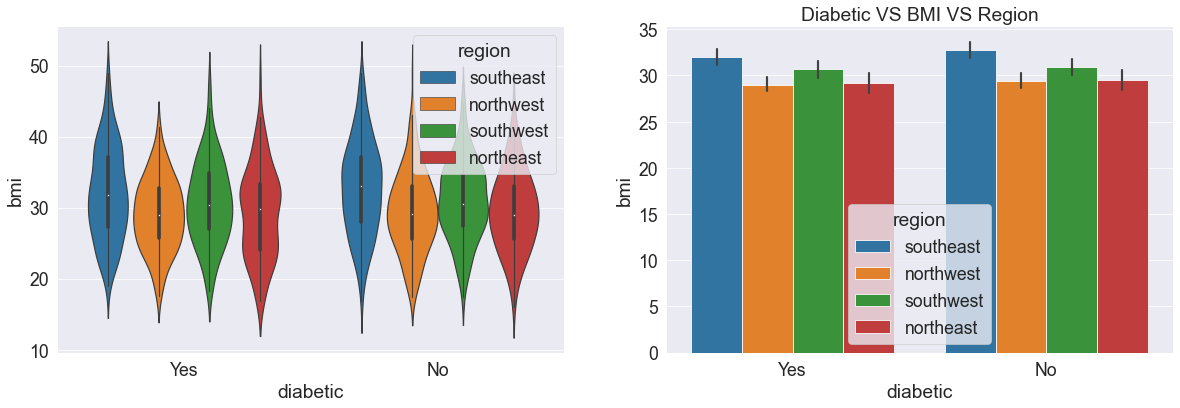

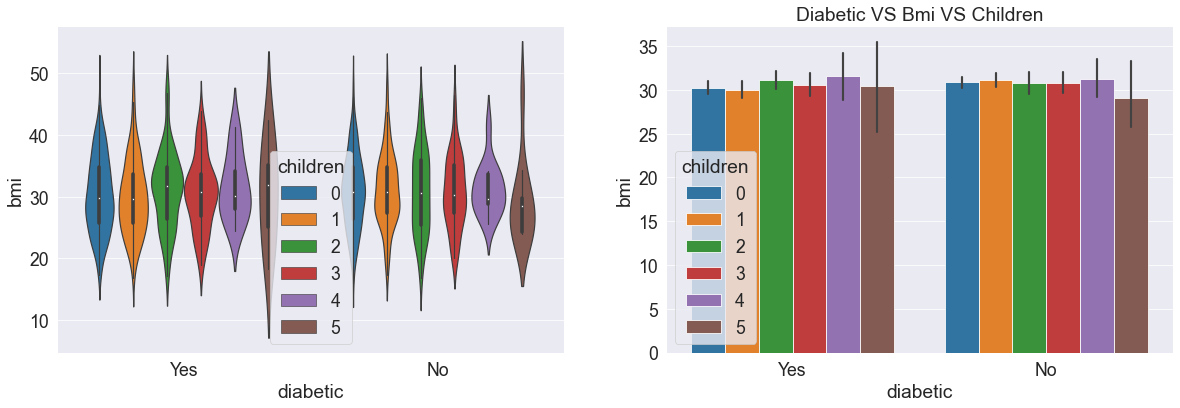

In [205]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Diabetic VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax2)
plt.title('Diabetic VS BMI VS Bloodpressure')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Bmi VS Children')

Text(0.5, 1.0, 'Diabetic VS Claim VS Region')

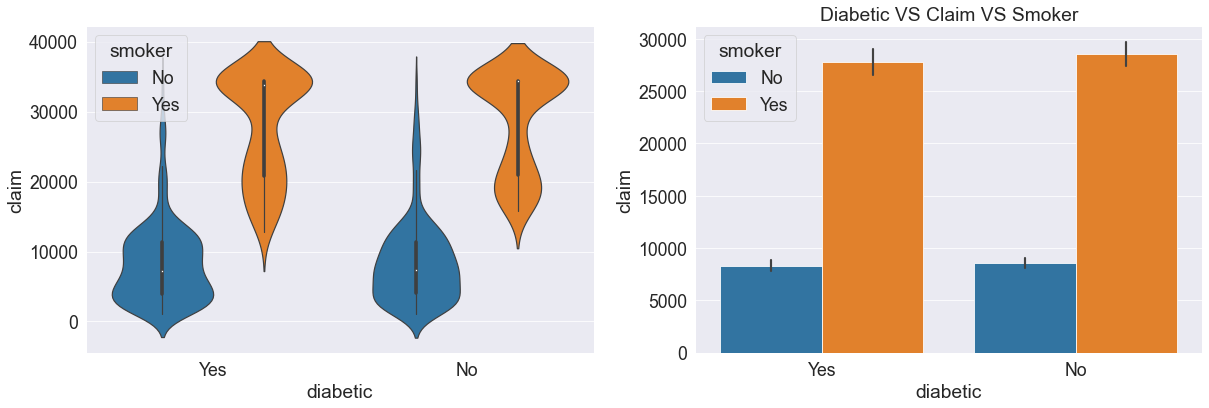

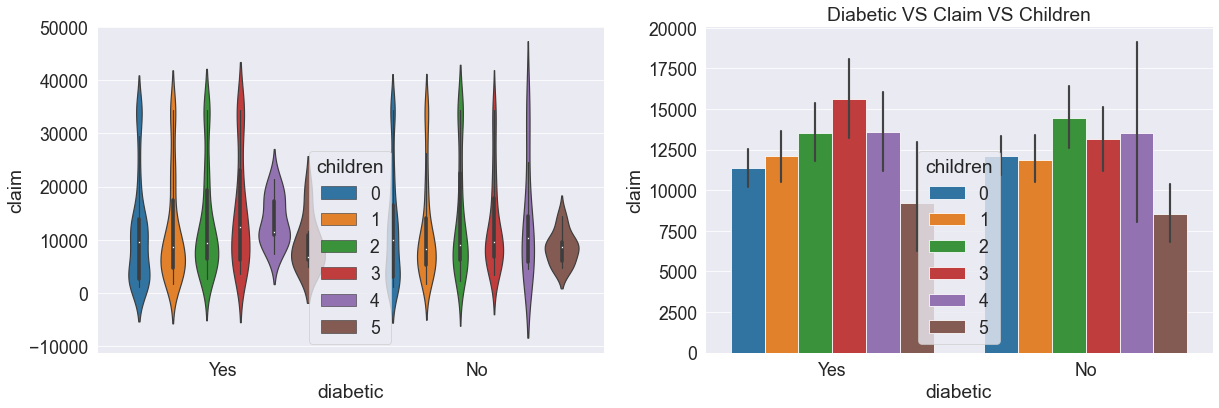

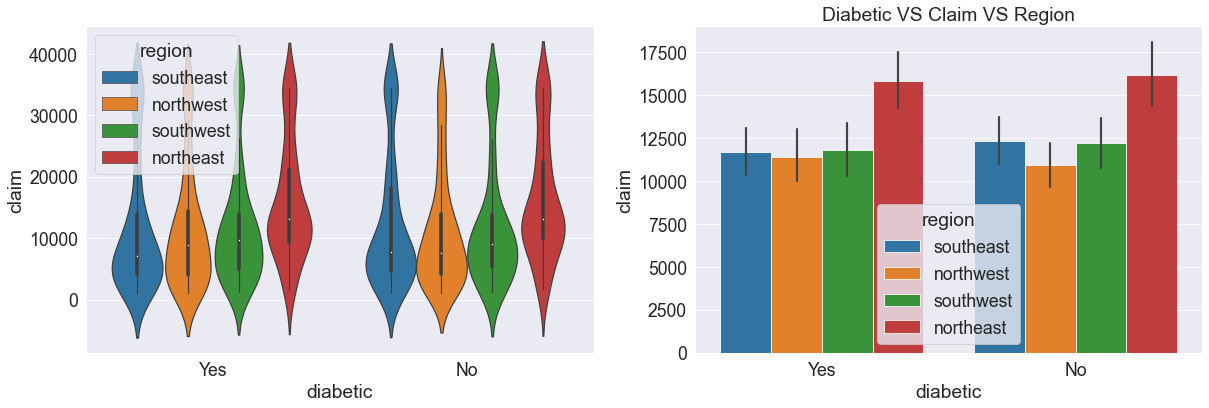

In [206]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Diabetic VS Claim VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Claim VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS Claim VS Region')

Text(0.5, 1.0, 'Catagorical BloodPressure VS BMI VS Children')

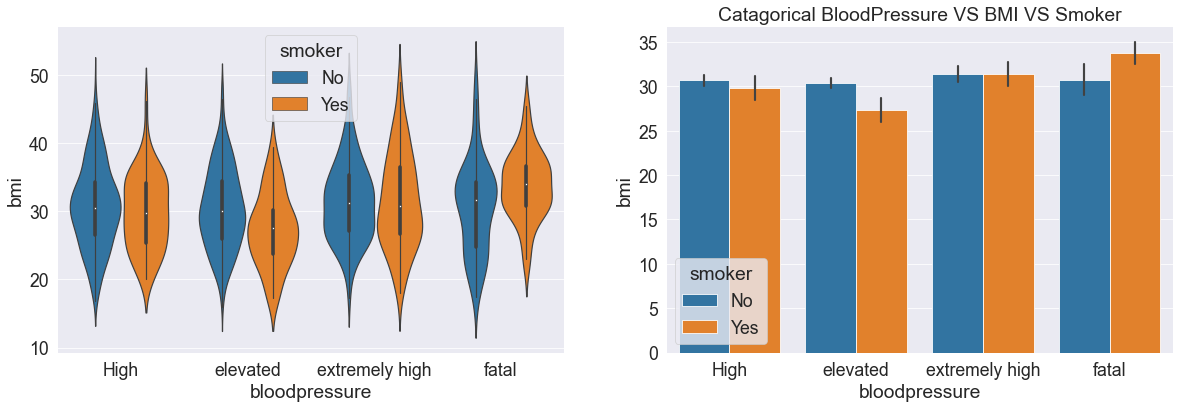

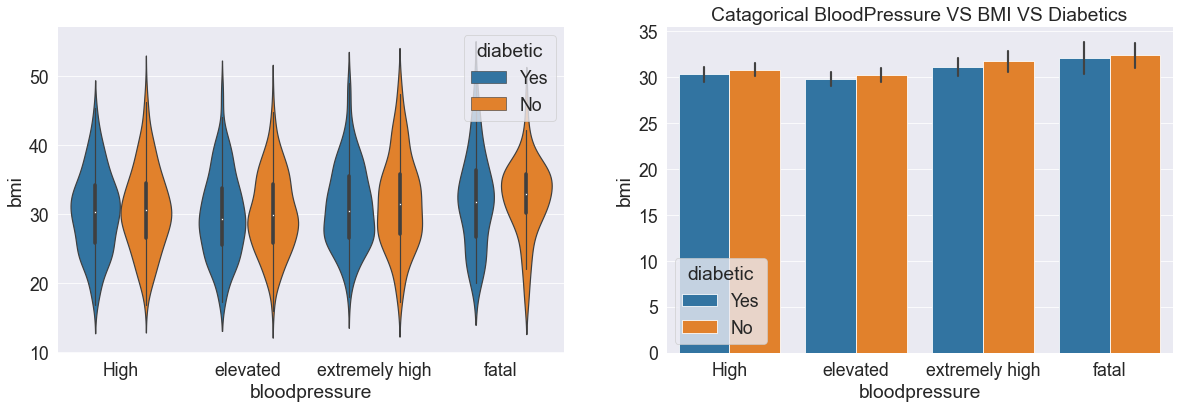

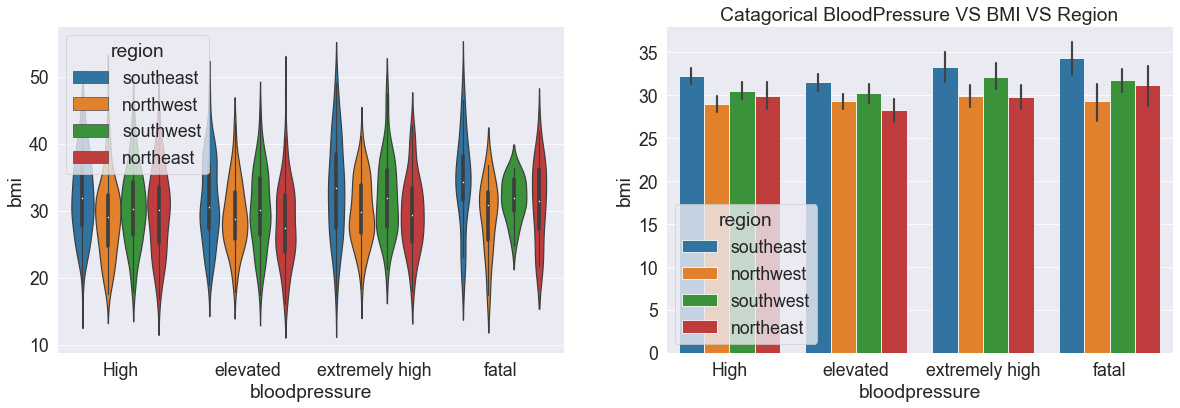

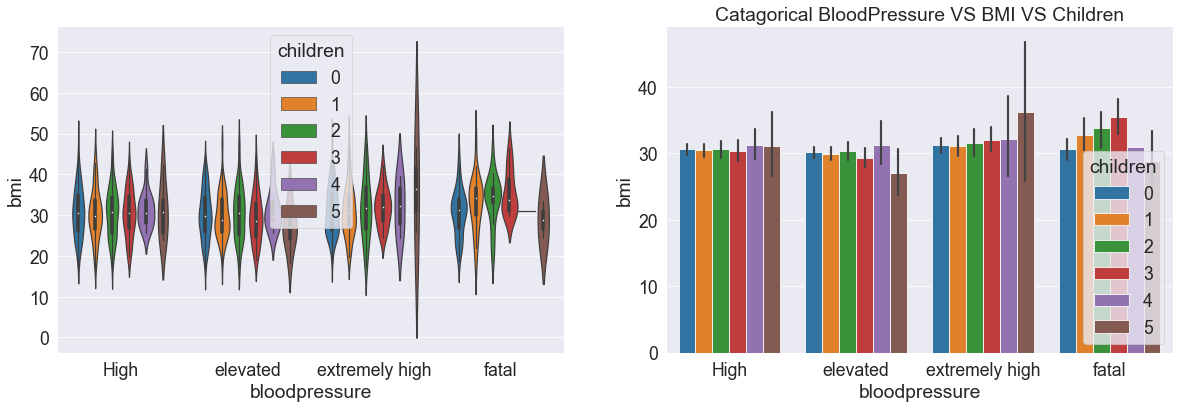

In [207]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Catagorical BloodPressure VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
plt.title('Catagorical BloodPressure VS BMI VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS BMI VS Region')
plt.title('Catagorical BloodPressure VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax2)
plt.title('Catagorical BloodPressure VS BMI VS Children')


Text(0.5, 1.0, 'Catagorical BloodPressure VS Claim VS Children')

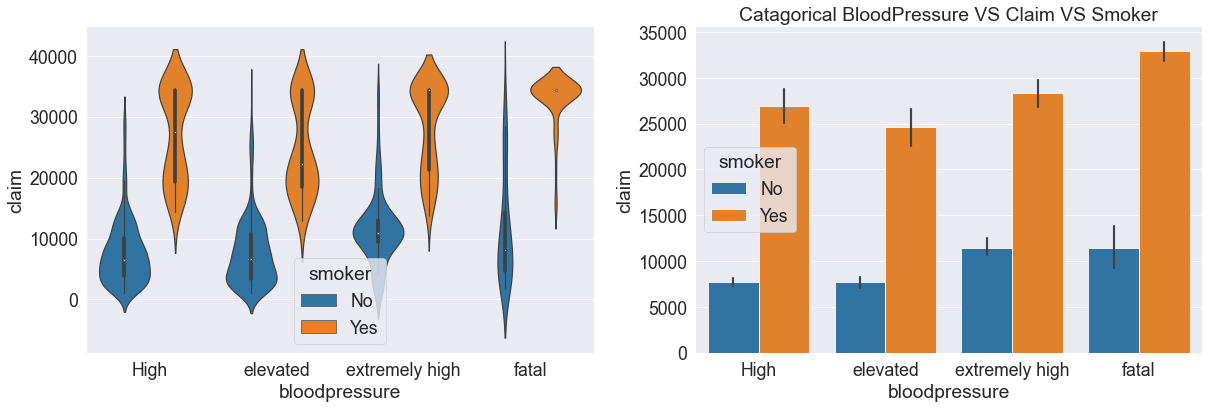

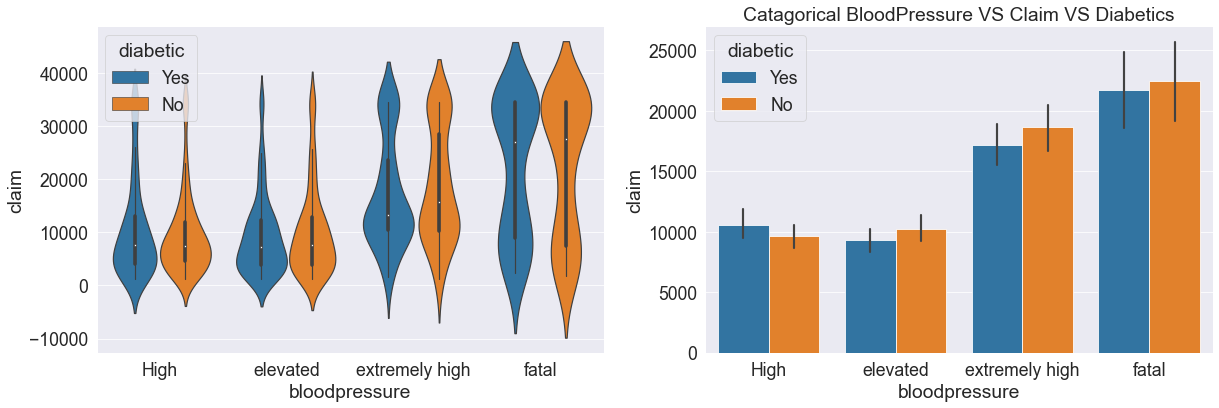

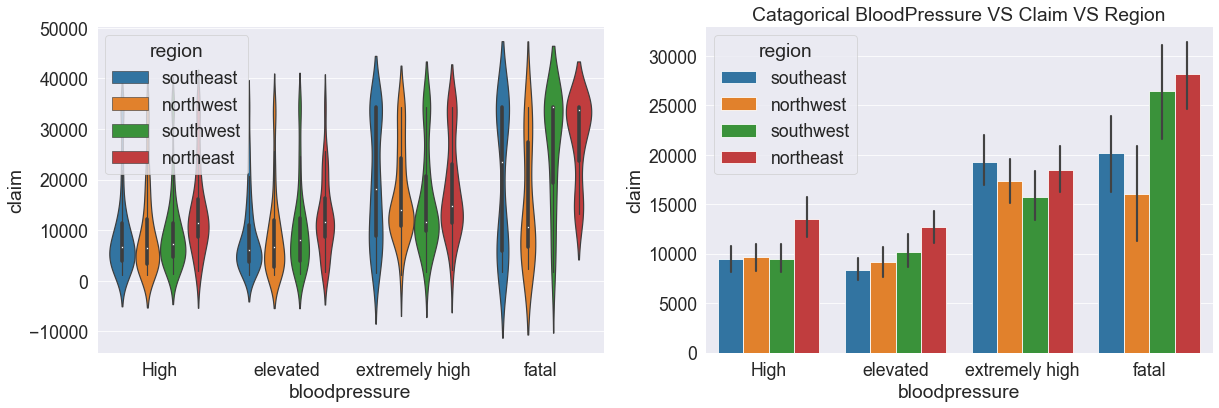

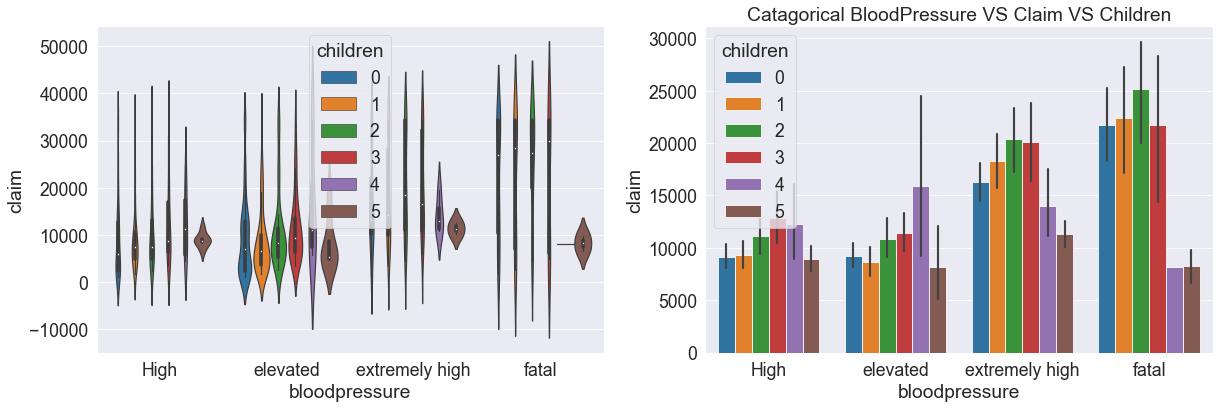

In [208]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Children')


Text(0.5, 1.0, 'Catagorical BMI VS Claim VS Children')

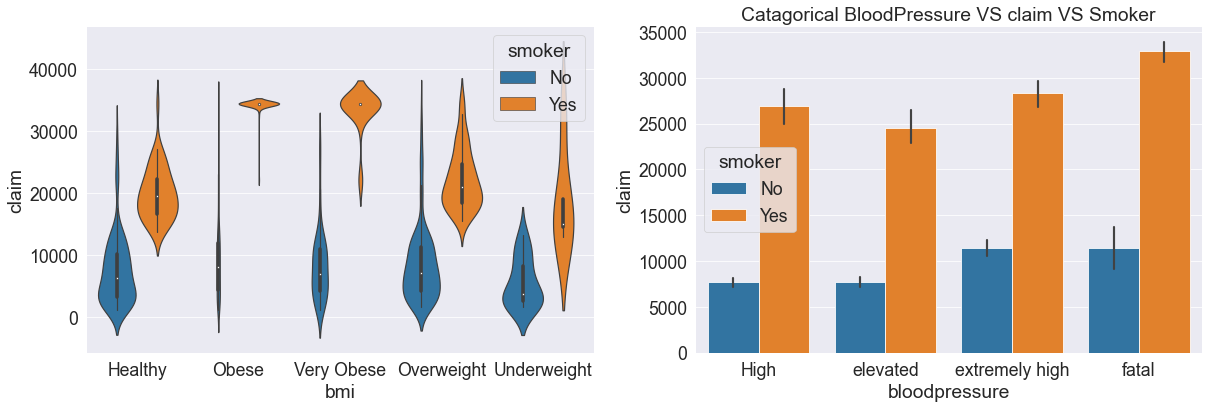

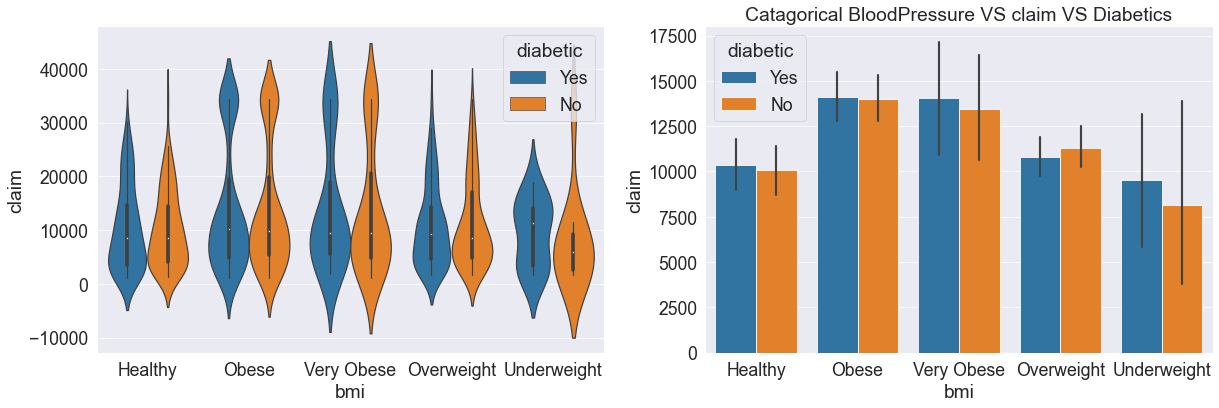

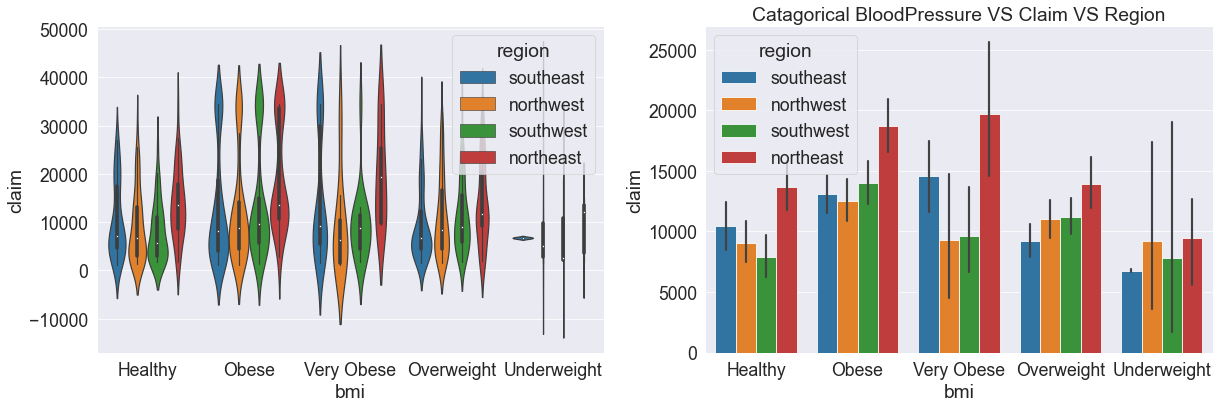

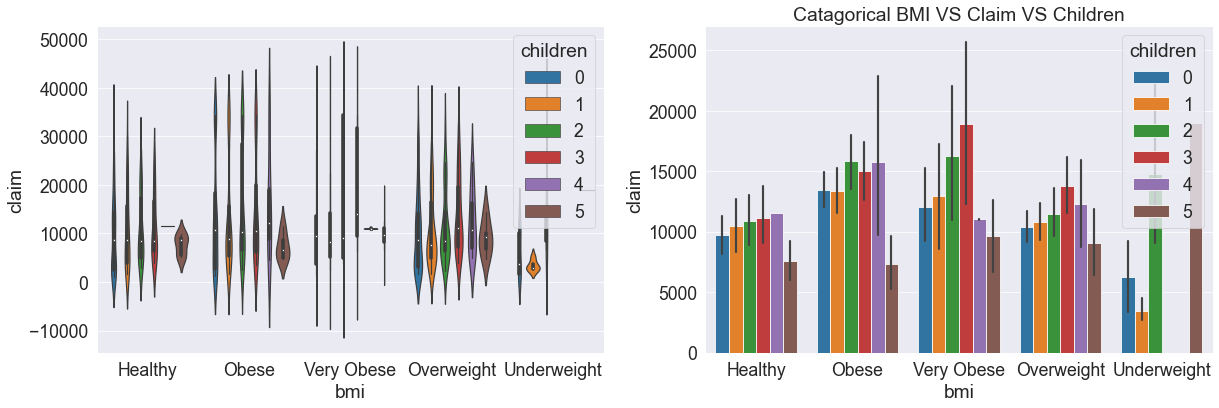

In [209]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Catagorical BloodPressure VS claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Catagorical BloodPressure VS claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Catagorical BMI VS Claim VS Children')


In [210]:
df.head(1)

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2           91.0      Yes         0     No  southeast   

     claim  
0  1121.87

# Num to Num Features

<AxesSubplot: xlabel='bmi', ylabel='claim'>

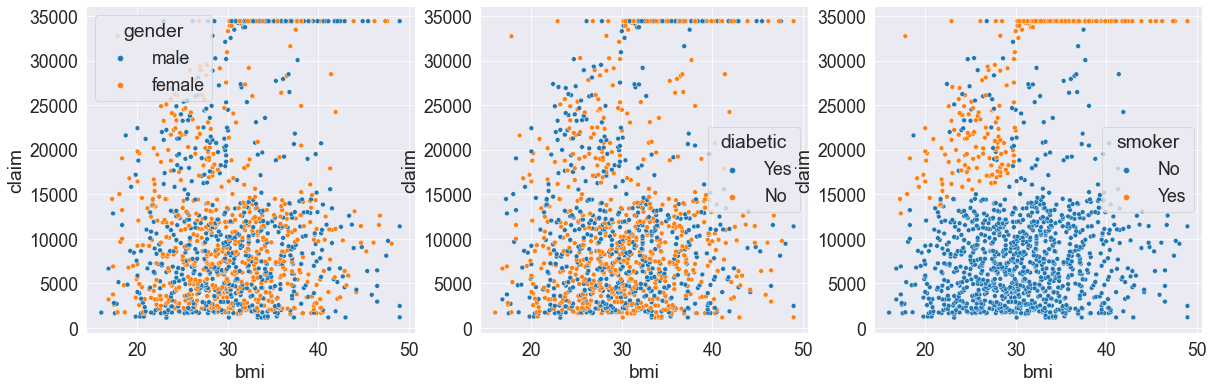

In [211]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['gender'],ax=ax1)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax3)


<AxesSubplot: xlabel='bloodpressure', ylabel='claim'>

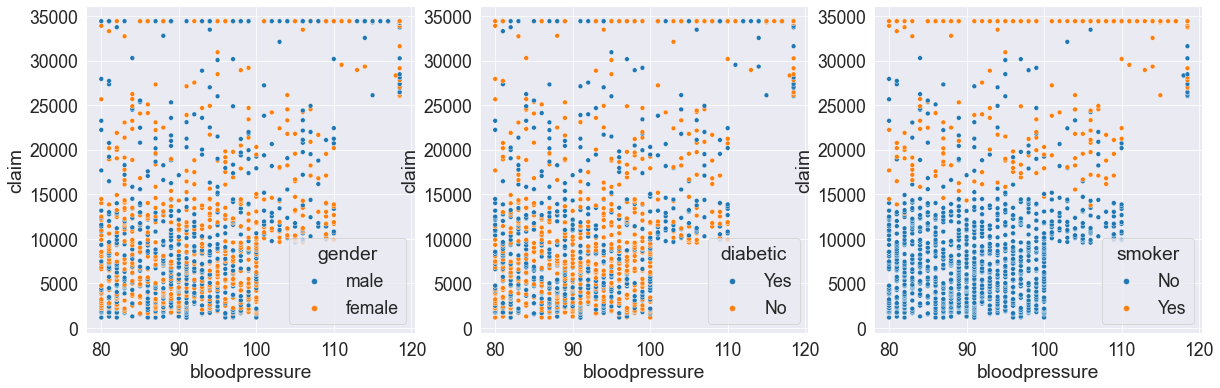

In [212]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['gender'],ax=ax1)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax3)

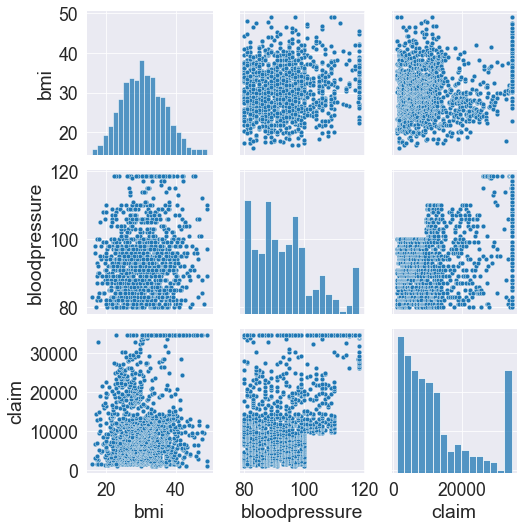

In [213]:
 sns.pairplot(df[['bmi','bloodpressure','claim']])

In [214]:
df[['bmi','bloodpressure','claim']].corr()

bmi  bloodpressure     claim
bmi            1.000000       0.141093  0.158803
bloodpressure  0.141093       1.000000  0.507629
claim          0.158803       0.507629  1.000000

<AxesSubplot: >

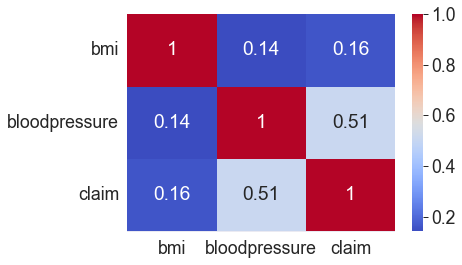

In [215]:
sns.heatmap(df[['bmi','bloodpressure','claim']].corr(),annot=True,cmap='coolwarm')

In [216]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

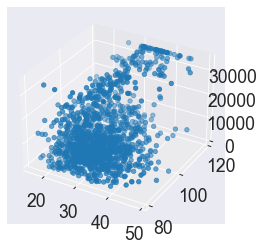

In [217]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['bmi'],df['bloodpressure'],df['claim'])

In [218]:
'''fig = plt.figure(figsize=(50,35))
ax1=plt.subplot(3,2,1)
ax2=plt.subplot(3,2,2)
ax3=plt.subplot(3,2,3)
ax4=plt.subplot(3,2,4)
ax5=plt.subplot(3,2,5)
ax6=plt.subplot(3,2,6)

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax1)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax2)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax3)
sns.scatterplot(x=df['bmi'],y=df['bloodpressure'],ax=ax4)
sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax5)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax6)
'''

"fig = plt.figure(figsize=(50,35))\nax1=plt.subplot(3,2,1)\nax2=plt.subplot(3,2,2)\nax3=plt.subplot(3,2,3)\nax4=plt.subplot(3,2,4)\nax5=plt.subplot(3,2,5)\nax6=plt.subplot(3,2,6)\n\nsns.scatterplot(x=df['age'],y=df['bmi'],ax=ax1)\nsns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax2)\nsns.scatterplot(x=df['age'],y=df['claim'],ax=ax3)\nsns.scatterplot(x=df['bmi'],y=df['bloodpressure'],ax=ax4)\nsns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax5)\nsns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax6)\n"

In [272]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

# Feature Engineering

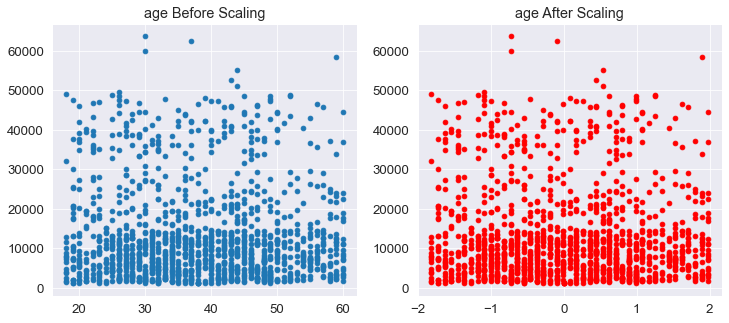

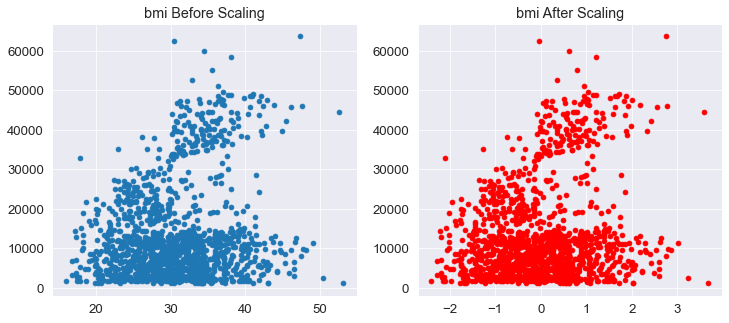

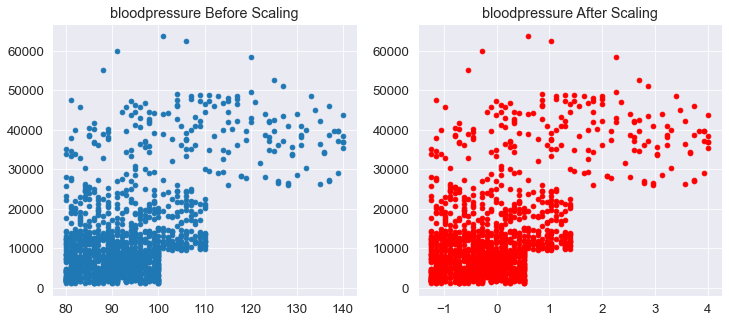

In [300]:
num_cols = ['age','bmi','bloodpressure']
for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(df[col], df['claim'])
    ax1.set_title(f"{col} Before Scaling") 
    scaler = StandardScaler()
    scaler.fit(df[[col]]) 
    df[col] = scaler.transform(df[[col]])
    ax2.scatter(df[col], df['claim'],color='red')
    ax2.set_title(f"{col} After Scaling")
    plt.show()


In [338]:
from sklearn.preprocessing import FunctionTransformer

In [339]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [340]:
def log_transformation(val):
    return np.log1p(val)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15976\219279562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bloodpressure'])


1.4835342102293079


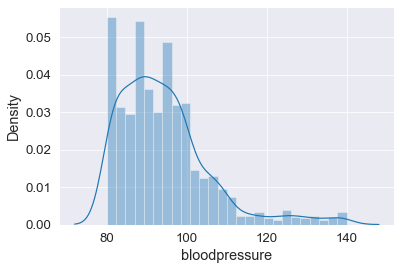

In [341]:
sns.distplot(df['bloodpressure'])
print(df['bloodpressure'].skew())

In [342]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

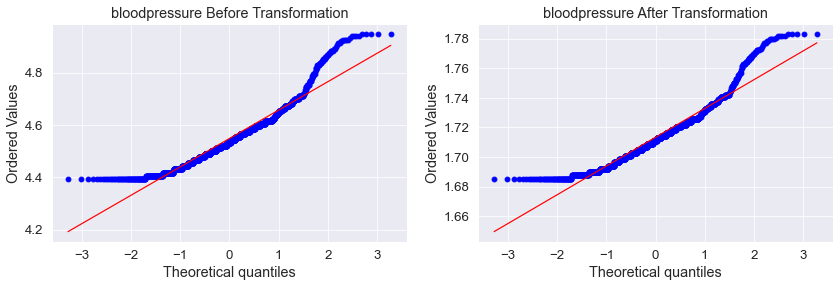

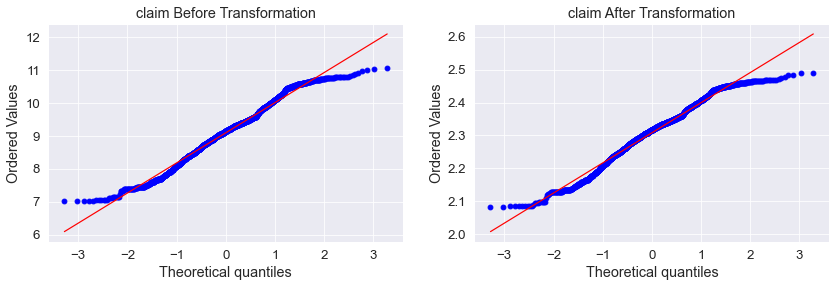

In [374]:
import scipy.stats as stats
num_cols = ['bloodpressure','claim']
for col in num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} Before Transformation')    
    
    df[col] = df[col].apply(log_transformation)
    
    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} After Transformation')
    plt.show()    






In [344]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [345]:
df['region'].fillna('mode',inplace=True)

In [346]:
df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [347]:
X = df.drop(columns=['claim'])
y = df[['claim']]

In [364]:
x_train,x_test,y_test,y_train = train_test_split(X,y,test_size=0.3)

In [365]:
y

claim
0      7.023643
1      7.032192
2      7.036096
3      7.036500
4      7.037036
...         ...
1335  10.917565
1336  10.978013
1337  11.002473
1338  11.044423
1339  11.063061

[1340 rows x 1 columns]

In [366]:
df.head(1)

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2       4.521789      Yes         0     No  southeast   

      claim  
0  7.023643

In [367]:
categorical_cols = [1,4,6,7]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, drop='first', dtype=int), categorical_cols)
    ],
    remainder='passthrough'  # Corrected to 'passthrough'
)


In [368]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [369]:
df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15976\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


age       bmi  bloodpressure  children     claim
age            1.000000 -0.042313      -0.066019 -0.025507 -0.006634
bmi           -0.042313  1.000000       0.140730  0.012655  0.131509
bloodpressure -0.066019  0.140730       1.000000 -0.031217  0.448982
children      -0.025507  0.012655      -0.031217  1.000000  0.163450
claim         -0.006634  0.131509       0.448982  0.163450  1.000000

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15976\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

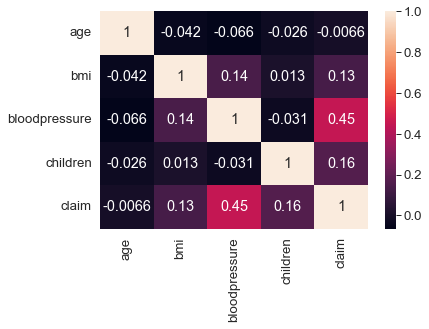

In [370]:
sns.heatmap(df.corr(),annot=True)

In [371]:
lr = LinearRegression()

In [372]:
x_train

array([[ 0.        ,  1.        ,  0.        , ..., 40.2       ,
         4.4543473 ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., 29.6       ,
         4.54329478,  1.        ],
       [ 0.        ,  1.        ,  1.        , ..., 32.8       ,
         4.68213123,  2.        ],
       ...,
       [ 1.        ,  1.        ,  0.        , ..., 19.6       ,
         4.52178858,  1.        ],
       [ 1.        ,  1.        ,  0.        , ..., 23.        ,
         4.40671925,  0.        ],
       [ 1.        ,  1.        ,  0.        , ..., 22.5       ,
         4.48863637,  2.        ]])

In [373]:
df

age  gender   bmi  bloodpressure diabetic  children smoker  \
0     39.000000    male  23.2       4.521789      Yes         0     No   
1     24.000000    male  30.1       4.477337       No         0     No   
2     38.078652    male  33.3       4.418841      Yes         0     No   
3     38.078652    male  33.7       4.394449       No         0     No   
4     38.078652    male  34.1       4.615121       No         0     No   
...         ...     ...   ...            ...      ...       ...    ...   
1335  44.000000  female  35.5       4.488636      Yes         0    Yes   
1336  59.000000  female  38.1       4.795791       No         1    Yes   
1337  30.000000    male  34.5       4.521789      Yes         3    Yes   
1338  37.000000    male  30.4       4.672829       No         0    Yes   
1339  30.000000  female  47.4       4.624973       No         0    Yes   

         region      claim  
0     southeast   7.023643  
1     southeast   7.032192  
2     southeast   7.036096  
3     northwest   7.036500  
4     northwest   7.037036  
...         ...        ...  
1335  northwest  10.917565  
1336  northeast  10.978013  
1337  northwest  11.002473  
1338  southeast  11.044423  
1339  southeast  11.063061  

[1340 rows x 9 columns]

In [295]:
df

age  gender       bmi  bloodpressure diabetic  children smoker  \
0     0.082405    male -1.226398      -0.312692      Yes         0     No   
1    -1.270428    male -0.092975      -1.117603       No         0     No   
2    -0.000690    male  0.432670            NaN      Yes         0     No   
3    -0.000690    male  0.498376            NaN       No         0     No   
4    -0.000690    male  0.564081       0.495552       No         0     No   
...        ...     ...       ...            ...      ...       ...    ...   
1335  0.533349  female  0.794051      -0.848244      Yes         0    Yes   
1336  1.886183  female  1.221138       1.256132       No         1    Yes   
1337 -0.729295    male  0.629787      -0.312692      Yes         3    Yes   
1338 -0.097973    male -0.043696       0.810051       No         0    Yes   
1339 -0.729295  female  2.748794       0.555325       No         0    Yes   

         region     claim  
0     southeast -1.183565  
1     southeast -1.180925  
2     southeast -1.179714  
3     northwest -1.179589  
4     northwest -1.179422  
...         ...       ...  
1335  northwest  1.132246  
1336  northeast  1.132246  
1337  northwest  1.132246  
1338  southeast  1.132246  
1339  southeast  1.132246  

[1337 rows x 9 columns]